In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import os
from sklearn.cluster import KMeans

In [2]:
import platform
platform.platform()

pwd = os.getcwd()
pwd

'/Users/songsiho/Desktop/4/data_science/project/project'

In [3]:
# matplotlib.rcParams['font.family']='NanumGothic'

In [4]:
matplotlib.rcParams['font.family']='AppleGothic'

In [5]:
def get_key_from_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None  # If the value is not found in the dictionary

# Dataset load

# Dataset overview

In [6]:
# consumer_values_details_df.info()

In [7]:
# prices_df.info()

In [8]:
# weights_df.info()

In [9]:
# consumer_values_df.info()

In [10]:
# inflation_values_df.info()

In [11]:
# item_character_value_df.info()

# Dataset preprocessing

# 품목성질별_소비자물가지수

In [147]:
item_character_value_df=pd.read_csv('dataset/item_character_value.csv',encoding='cp949')
item_character_value_df.drop('시도별',axis=1,inplace=True)
item_character_value_df.columns=[x.replace(".","") for x in item_character_value_df.columns]
# item_character_value_df.set_index=item_character_value_df['품목성질별']
item_character_value_df

,품목성질별,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
0,총지수,100.16,99.94,99.50,99.44,99.71,99.63,100.19,100.74,100.18,...,108.22,108.74,108.62,108.93,109.21,109.10,109.28,110.10,110.38,110.56
1,상품,100.35,100.08,99.04,98.89,99.41,99.04,99.91,101.34,101.33,...,111.04,111.62,110.92,111.67,111.98,111.73,111.83,112.77,112.84,112.95
2,농축수산물,94.73,96.57,95.78,96.98,97.40,98.45,103.30,108.68,108.45,...,111.80,114.40,116.74,118.99,114.68,109.78,110.64,113.60,112.96,113.15
3,공업제품,101.40,100.61,99.42,98.93,99.54,99.92,99.89,99.77,99.81,...,111.19,111.46,109.95,109.68,110.15,110.99,110.91,110.90,111.13,111.24
4,전기 · 가스 · 수도,103.39,103.22,103.13,103.13,103.05,91.60,91.82,99.32,99.33,...,107.66,106.48,106.55,113.96,123.94,123.94,124.02,129.72,129.78,129.79
5,서비스,99.98,99.82,99.91,99.92,99.98,100.15,100.44,100.22,99.17,...,105.75,106.22,106.60,106.53,106.78,106.79,107.05,107.76,108.23,108.47
6,집세,99.81,99.83,99.86,99.88,99.91,99.96,100.03,100.09,100.19,...,103.22,103.33,103.45,103.58,103.65,103.77,103.84,103.91,103.90,103.85
7,공공서비스,100.76,100.61,100.59,100.46,100.42,100.47,100.60,100.31,95.11,...,101.71,101.81,101.83,101.72,101.71,101.72,101.82,102.63,102.73,102.69
8,개인서비스,99.72,99.49,99.65,99.71,99.81,100.09,100.51,100.22,100.53,...,108.23,108.97,109.58,109.47,109.88,109.86,110.24,111.12,111.88,112.34


In [148]:
item_character_df = item_character_value_df.set_index('품목성질별')
item_character_df.drop(['총지수','상품'],axis=0,inplace=True)

In [149]:
item_character_df

,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
품목성질별,,,,,,,,,,,,,,,,,,,,,
농축수산물,94.73,96.57,95.78,96.98,97.40,98.45,103.30,108.68,108.45,101.74,...,111.80,114.40,116.74,118.99,114.68,109.78,110.64,113.60,112.96,113.15
공업제품,101.40,100.61,99.42,98.93,99.54,99.92,99.89,99.77,99.81,99.61,...,111.19,111.46,109.95,109.68,110.15,110.99,110.91,110.90,111.13,111.24
전기 · 가스 · 수도,103.39,103.22,103.13,103.13,103.05,91.60,91.82,99.32,99.33,99.33,...,107.66,106.48,106.55,113.96,123.94,123.94,124.02,129.72,129.78,129.79
서비스,99.98,99.82,99.91,99.92,99.98,100.15,100.44,100.22,99.17,100.19,...,105.75,106.22,106.60,106.53,106.78,106.79,107.05,107.76,108.23,108.47
집세,99.81,99.83,99.86,99.88,99.91,99.96,100.03,100.09,100.19,100.28,...,103.22,103.33,103.45,103.58,103.65,103.77,103.84,103.91,103.90,103.85
공공서비스,100.76,100.61,100.59,100.46,100.42,100.47,100.60,100.31,95.11,99.72,...,101.71,101.81,101.83,101.72,101.71,101.72,101.82,102.63,102.73,102.69
개인서비스,99.72,99.49,99.65,99.71,99.81,100.09,100.51,100.22,100.53,100.35,...,108.23,108.97,109.58,109.47,109.88,109.86,110.24,111.12,111.88,112.34


## 품목별 물가지수

In [145]:
prices_df = pd.read_csv('dataset/prices.csv') # 품목별 물가지수
prices_df.rename(columns = {'주요품목별(1)' : '품목'}, inplace = True)
prices_df.columns = [x.replace('.', '') for x in prices_df.columns]
prices_df.columns = [x.replace(' ', '') for x in prices_df.columns]

In [146]:
prices_df.head()

,품목,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
0,쌀,97.09,96.28,96.80,95.61,97.48,97.21,98.49,100.79,105.70,...,95.25,93.16,91.26,89.67,88.25,93.14,92.39,92.25,92.96,92.31
1,돼지고기,82.09,89.98,93.91,105.05,108.84,108.37,108.25,104.54,108.15,...,136.05,128.35,123.99,129.11,121.75,119.17,118.89,117.37,110.47,109.06
2,국산쇠고기,97.24,96.32,97.99,98.46,101.79,100.46,100.67,102.90,102.99,...,108.50,109.27,109.06,111.69,111.68,109.53,107.47,107.84,102.98,101.49
3,우유,100.03,100.03,100.03,100.10,100.10,99.69,99.94,99.94,100.05,...,107.27,107.02,106.87,106.96,107.08,107.08,115.89,116.30,116.55,116.55
4,라면,98.30,100.81,101.27,101.43,100.67,100.14,100.09,100.49,99.24,...,108.74,109.79,109.83,113.22,124.14,121.59,121.90,123.20,123.39,122.34


## 품목별 가중치

In [17]:
weights_df= pd.read_excel('dataset/weights.xlsx') # 품목별 가중치 
weights_df.rename(columns={'2020년 기준 품목 및 가중치':'category','Unnamed: 2':'items','Unnamed: 3':'weight'},inplace=True)
weights_df=weights_df.iloc[2:]
weights_df=weights_df.loc[:,['category','items','weight']]
weights_df = weights_df.reset_index(drop=True)
category_list=(sorted(list(set(weights_df['category']))))
category_dict= {value:index for index,value in enumerate(category_list)}
print(category_dict)
weights_df['category'] = weights_df['category'].apply(lambda x: category_dict[x] if x in category_dict else x)
weights_df

{'01 식료품 및 비주류음료': 0, '02 주류 및 담배': 1, '03 의류 및 신발': 2, '04 주택, 수도, 전기 및 연료': 3, '05 가정용품 및 가사 서비스': 4, '06 보건': 5, '07 교통': 6, '08 통신': 7, '09 오락 및 문화': 8, '10 교육': 9, '11 음식 및 숙박': 10, '12 기타 상품 및 서비스': 11}


,category,items,weight
0,0,쌀,5.5
1,0,현미,0.5
2,0,찹쌀,0.7
3,0,보리쌀,0.2
4,0,콩,0.6
...,...,...,...
453,11,부동산중개수수료,1.7
454,11,행정수수료,0.9
455,11,대입전형료,0.2
456,11,시험응시료,0.4


## 기대 인플레이션

In [18]:
inflation_values_df= pd.read_csv('dataset/inflation.csv',encoding='cp949') # 기대 인플레이션 
inflation_values_df.columns = [x.replace('.','') for x in inflation_values_df.columns]
inflation_values_df=inflation_values_df[(inflation_values_df['CSI코드별']== '물가인식') | (inflation_values_df['CSI코드별']== '기대인플레이션율')]
inflation_values_df.reset_index(drop=True,inplace=True)
inflation_values_df
#물가인식 : 지난 1년간 소비자물가상승률에 대한 인식 
#기대인플레이션 : 향후 1년간 소비자물가상승률 전망

#소비자의 물가에 대한 인식과 실제 물가 변동률 
#소비자의 물가인식은 최근 몇개월동안의 물가 변동에 영향을 가장 크게 받지 않을까? 

#물가인식과 기대인플레이션율에 대한 연관관계 
#가정 : 물가가 어느정도 선으로 오르면 그정도 오르겠지 라고 생각하는 것 같다 하지만, 특정 임계점 (물가가 너무 올랐다 라고 생각하는 시점) 에서부터는 이것보다는 덜 오르겠지 라는 심리가 반영되고 있는 것 같다

,CSI코드별,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202207,202208,202209,202210,202211,202212,202301,202302,202303,202304
0,물가인식,1.8,1.8,1.8,1.7,1.7,1.7,1.8,1.9,1.9,...,5.1,5.1,5.1,5.2,5.1,5.0,5.0,5.2,5.1,4.9
1,기대인플레이션율,1.7,1.7,1.7,1.6,1.6,1.7,1.8,1.9,1.8,...,4.7,4.3,4.2,4.3,4.2,3.8,3.9,4.0,3.9,3.7


## 소비자 심리지수 상세정보

In [128]:
consumer_values_details_df=pd.read_csv('dataset/소비자심리지수상세.csv',encoding='cp949') #소비자 심리지수 상세정보
csi_list=sorted(list(set(consumer_values_details_df['CSI코드별'])))
csi_dict = {value: index for index, value in enumerate(csi_list)}
consumer_values_details_df.drop(['항목','단위','Unnamed: 45'],axis=1,inplace=True)
# csi_list
# consumer_values_details_df
consumer_values_details_df['CSI코드별']=consumer_values_details_df['CSI코드별'].apply(lambda x: csi_dict[x] if x in csi_dict else x)
consumer_values_details_df.columns = [i.replace('.',"") for i in consumer_values_details_df.columns]
consumer_values_details_df.columns = [i.replace('월',"") for i in consumer_values_details_df.columns]
consumer_values_details_df = consumer_values_details_df.sort_values(by='CSI코드별')
consumer_values_details_df.reset_index(drop=True,inplace=True)
consumer_values_details_df.drop('202304 ',axis=1,inplace=True)

In [129]:
consumer_values_details_df

,CSI코드별,CSI분류코드별,202001,202002,202003,202004,202005,202006,202007,202008,...,202207,202208,202209,202210,202211,202212,202301,202302,202303,202305
0,0,전체,98,98.0,99.0,102.0,100.0,99.0,100.0,99.0,...,102.0,101,101.0,102,102.0,100.0,102.0,100.0,100,99
1,0,400-500만원,99,98.0,96.0,100.0,97.0,99.0,98.0,95.0,...,104.0,99,100.0,99,101.0,103.0,101.0,102.0,103,102
2,0,70세이상,101,101.0,102.0,106.0,102.0,99.0,102.0,101.0,...,101.0,101,99.0,99,101.0,100.0,103.0,98.0,100,99
3,0,300-400만원,100,102.0,102.0,105.0,101.0,102.0,103.0,102.0,...,106.0,105,105.0,104,108.0,108.0,106.0,106.0,104,103
4,0,60-70세,97,97.0,99.0,102.0,100.0,101.0,100.0,98.0,...,101.0,100,96.0,101,99.0,98.0,102.0,97.0,98,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,24,300-400만원,91,87.0,79.0,78.0,78.0,79.0,82.0,82.0,...,79.0,84,84.0,81,80.0,82.0,79.0,78.0,80,87
525,24,70세이상,88,84.0,77.0,71.0,77.0,84.0,84.0,81.0,...,77.0,77,81.0,84,82.0,79.0,82.0,80.0,83,86
526,24,500만원이상,100,101.0,92.0,86.0,88.0,92.0,94.0,93.0,...,87.0,89,90.0,86,86.0,86.0,87.0,87.0,88,93
527,24,임차 등,95,93.0,85.0,81.0,82.0,86.0,88.0,86.0,...,82.0,84,86.0,83,83.0,82.0,81.0,82.0,82,87


In [130]:
csi_dict

{'가계부채전망CSI': 0,
 '가계수입전망CSI': 1,
 '가계저축전망CSI': 2,
 '교양·오락·문화생활비 지출전망CSI': 3,
 '교육비 지출전망CSI': 4,
 '교통비 및 통신비 지출전망CSI': 5,
 '금리수준전망CSI': 6,
 '내구재 지출전망CSI': 7,
 '물가수준전망(1년후)CSI': 8,
 '생활형편전망CSI': 9,
 '소비자심리지수': 10,
 '소비지출전망CSI': 11,
 '여행비 지출전망CSI': 12,
 '외식비 지출전망CSI': 13,
 '의료·보건비 지출전망CSI': 14,
 '의류비 지출전망CSI': 15,
 '임금수준전망CSI': 16,
 '주거비 지출전망CSI': 17,
 '주택가격전망CSI': 18,
 '취업기회전망CSI': 19,
 '향후경기전망CSI': 20,
 '현재가계부채CSI': 21,
 '현재가계저축CSI': 22,
 '현재경기판단CSI': 23,
 '현재생활형편CSI': 24}

In [131]:
#소비자 심리지수
consumer_values_details_df[consumer_values_details_df['CSI코드별']==10]

,CSI코드별,CSI분류코드별,202001,202002,202003,202004,202005,202006,202007,202008,...,202207,202208,202209,202210,202211,202212,202301,202302,202303,202305
220,10,전체,105,97.8,79.9,72.5,79.1,83.3,85.6,89.4,...,86.3,89,91.6,89,86.7,90.2,90.7,90.2,92,98


# 데이터 분석
소비자 심리지수와 기대인플레이션 과의 상관관계

### 전체를 기준으로 살펴보기

In [132]:
csi_all=consumer_values_details_df[consumer_values_details_df['CSI분류코드별']=='전체']
csi_all.reset_index(drop=True,inplace=True)
csi_all.drop('CSI분류코드별',axis=1,inplace=True)

/var/folders/y1/08kzpz3x6_n3fkyg8spwflyc0000gn/T/ipykernel_24193/1923318270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csi_all.drop('CSI분류코드별',axis=1,inplace=True)


In [133]:
# csi_all.set_index("CSI코드별",inplace=True)

In [134]:
csi_all

,CSI코드별,202001,202002,202003,202004,202005,202006,202007,202008,202009,...,202207,202208,202209,202210,202211,202212,202301,202302,202303,202305
0,0,98,98.0,99.0,102.0,100.0,99.0,100.0,99.0,101.0,...,102.0,101,101.0,102,102.0,100.0,102.0,100.0,100,99
1,1,101,97.0,87.0,83.0,87.0,88.0,90.0,92.0,88.0,...,93.0,94,96.0,94,93.0,95.0,96.0,95.0,96,97
2,2,97,96.0,90.0,87.0,88.0,91.0,91.0,92.0,89.0,...,88.0,90,92.0,90,91.0,91.0,91.0,91.0,93,94
3,3,91,88.0,77.0,74.0,76.0,77.0,79.0,82.0,74.0,...,93.0,91,93.0,92,89.0,92.0,91.0,91.0,92,94
4,4,105,103.0,95.0,92.0,94.0,95.0,96.0,97.0,93.0,...,97.0,97,99.0,97,96.0,99.0,100.0,101.0,99,99
5,5,109,106.0,99.0,97.0,99.0,100.0,101.0,102.0,99.0,...,114.0,112,110.0,112,110.0,110.0,114.0,117.0,112,109
6,6,95,92.0,72.0,77.0,82.0,82.0,88.0,90.0,89.0,...,152.0,149,147.0,150,151.0,133.0,132.0,113.0,120,114
7,7,95,93.0,85.0,81.0,83.0,84.0,86.0,88.0,83.0,...,89.0,91,92.0,91,89.0,90.0,91.0,91.0,90,94
8,8,139,137.0,134.0,132.0,131.0,132.0,135.0,139.0,139.0,...,166.0,158,157.0,157,156.0,151.0,151.0,153.0,151,146
9,9,97,93.0,83.0,79.0,85.0,87.0,87.0,89.0,85.0,...,79.0,83,86.0,84,82.0,85.0,85.0,83.0,87,92


In [135]:
csi_dict

{'가계부채전망CSI': 0,
 '가계수입전망CSI': 1,
 '가계저축전망CSI': 2,
 '교양·오락·문화생활비 지출전망CSI': 3,
 '교육비 지출전망CSI': 4,
 '교통비 및 통신비 지출전망CSI': 5,
 '금리수준전망CSI': 6,
 '내구재 지출전망CSI': 7,
 '물가수준전망(1년후)CSI': 8,
 '생활형편전망CSI': 9,
 '소비자심리지수': 10,
 '소비지출전망CSI': 11,
 '여행비 지출전망CSI': 12,
 '외식비 지출전망CSI': 13,
 '의료·보건비 지출전망CSI': 14,
 '의류비 지출전망CSI': 15,
 '임금수준전망CSI': 16,
 '주거비 지출전망CSI': 17,
 '주택가격전망CSI': 18,
 '취업기회전망CSI': 19,
 '향후경기전망CSI': 20,
 '현재가계부채CSI': 21,
 '현재가계저축CSI': 22,
 '현재경기판단CSI': 23,
 '현재생활형편CSI': 24}

### 소비자 심리지수는 values=[24(현재생활형편),23(현재경기판단),11(소비지출전망),1(가계수입전망),9(생활형편전망),20(향후경기전망)] 으로 계산됨

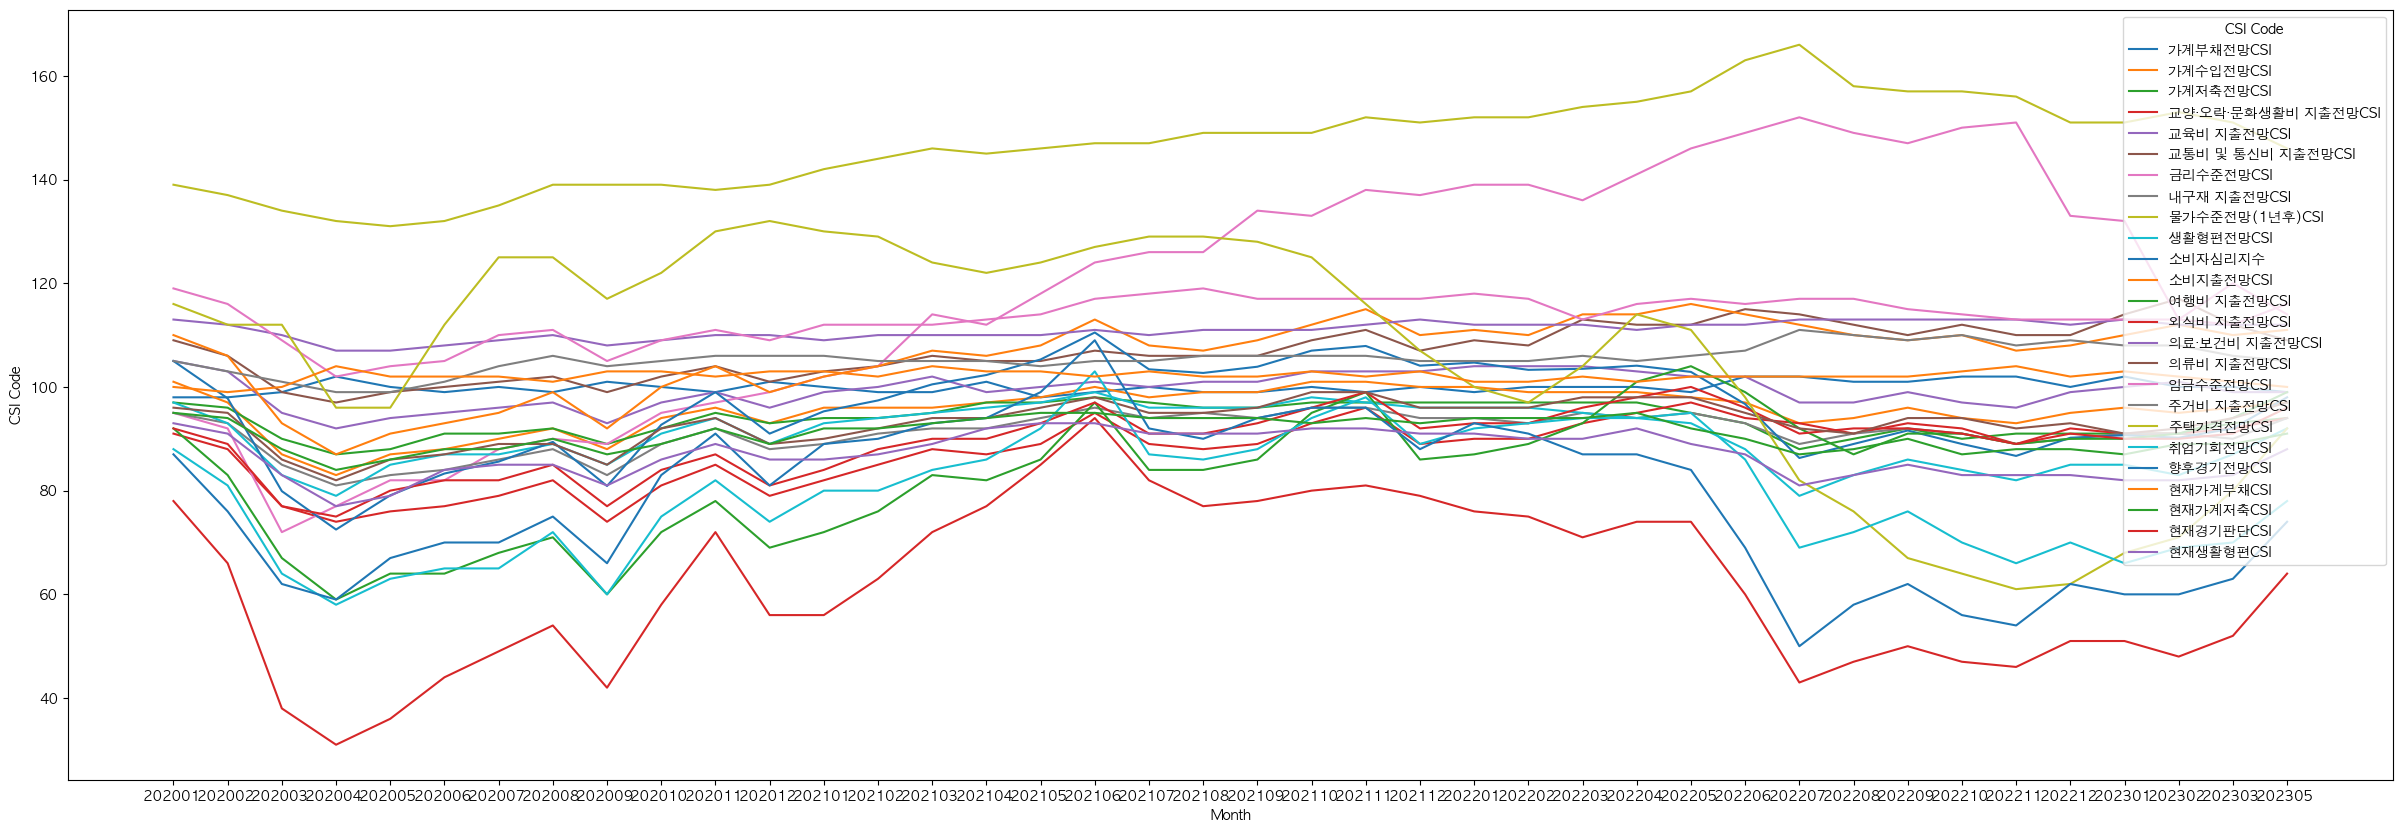

In [136]:
# CSI 코드별로 시각화
plt.figure(figsize=(30,10))
for csi_code in csi_all['CSI코드별']:
    plt.plot(csi_all.columns[1:], csi_all.loc[csi_all['CSI코드별'] == csi_code].values[0][1:], label=get_key_from_value(csi_dict,csi_code))

plt.xlabel('Month')
plt.ylabel('CSI Code')
plt.legend(title='CSI Code')
# plt.figure(figsize=(20,10))
plt.show()

### 물가 수준전망(현재와 비교한 1년 후 전망) , 금리 수준전망(현재와 비교한 6개월 후 전망)순으로 가장 높음 //// 현재 경기 판단(6개월 전과 비교한 현재) , 향후 경기 전망(현재와 비교한 6개월 후 전망) ,

In [137]:
csi_all

,CSI코드별,202001,202002,202003,202004,202005,202006,202007,202008,202009,...,202207,202208,202209,202210,202211,202212,202301,202302,202303,202305
0,0,98,98.0,99.0,102.0,100.0,99.0,100.0,99.0,101.0,...,102.0,101,101.0,102,102.0,100.0,102.0,100.0,100,99
1,1,101,97.0,87.0,83.0,87.0,88.0,90.0,92.0,88.0,...,93.0,94,96.0,94,93.0,95.0,96.0,95.0,96,97
2,2,97,96.0,90.0,87.0,88.0,91.0,91.0,92.0,89.0,...,88.0,90,92.0,90,91.0,91.0,91.0,91.0,93,94
3,3,91,88.0,77.0,74.0,76.0,77.0,79.0,82.0,74.0,...,93.0,91,93.0,92,89.0,92.0,91.0,91.0,92,94
4,4,105,103.0,95.0,92.0,94.0,95.0,96.0,97.0,93.0,...,97.0,97,99.0,97,96.0,99.0,100.0,101.0,99,99
5,5,109,106.0,99.0,97.0,99.0,100.0,101.0,102.0,99.0,...,114.0,112,110.0,112,110.0,110.0,114.0,117.0,112,109
6,6,95,92.0,72.0,77.0,82.0,82.0,88.0,90.0,89.0,...,152.0,149,147.0,150,151.0,133.0,132.0,113.0,120,114
7,7,95,93.0,85.0,81.0,83.0,84.0,86.0,88.0,83.0,...,89.0,91,92.0,91,89.0,90.0,91.0,91.0,90,94
8,8,139,137.0,134.0,132.0,131.0,132.0,135.0,139.0,139.0,...,166.0,158,157.0,157,156.0,151.0,151.0,153.0,151,146
9,9,97,93.0,83.0,79.0,85.0,87.0,87.0,89.0,85.0,...,79.0,83,86.0,84,82.0,85.0,85.0,83.0,87,92


### 소비자 심리지수는 values=[24(현재생활형편),23(현재경기판단),11(소비지출전망),1(가계수입전망),9(생활형편전망),20(향후경기전망)] 으로 계산됨

In [139]:
csi_calcu_list=[1,9,10,11,20,23,24]

In [140]:
filtered_csi_all=csi_all[csi_all['CSI코드별'].isin(csi_calcu_list)]

In [141]:
filtered_csi_all

,CSI코드별,202001,202002,202003,202004,202005,202006,202007,202008,202009,...,202207,202208,202209,202210,202211,202212,202301,202302,202303,202305
1,1,101,97.0,87.0,83.0,87.0,88.0,90.0,92.0,88.0,...,93.0,94,96.0,94,93.0,95.0,96.0,95.0,96,97
9,9,97,93.0,83.0,79.0,85.0,87.0,87.0,89.0,85.0,...,79.0,83,86.0,84,82.0,85.0,85.0,83.0,87,92
10,10,105,97.8,79.9,72.5,79.1,83.3,85.6,89.4,80.9,...,86.3,89,91.6,89,86.7,90.2,90.7,90.2,92,98
11,11,110,106.0,93.0,87.0,91.0,93.0,95.0,99.0,92.0,...,112.0,110,109.0,110,107.0,108.0,110.0,112.0,110,111
20,20,87,76.0,62.0,59.0,67.0,70.0,70.0,75.0,66.0,...,50.0,58,62.0,56,54.0,62.0,60.0,60.0,63,74
23,23,78,66.0,38.0,31.0,36.0,44.0,49.0,54.0,42.0,...,43.0,47,50.0,47,46.0,51.0,51.0,48.0,52,64
24,24,93,91.0,83.0,77.0,79.0,84.0,85.0,85.0,81.0,...,81.0,83,85.0,83,83.0,83.0,82.0,82.0,83,88


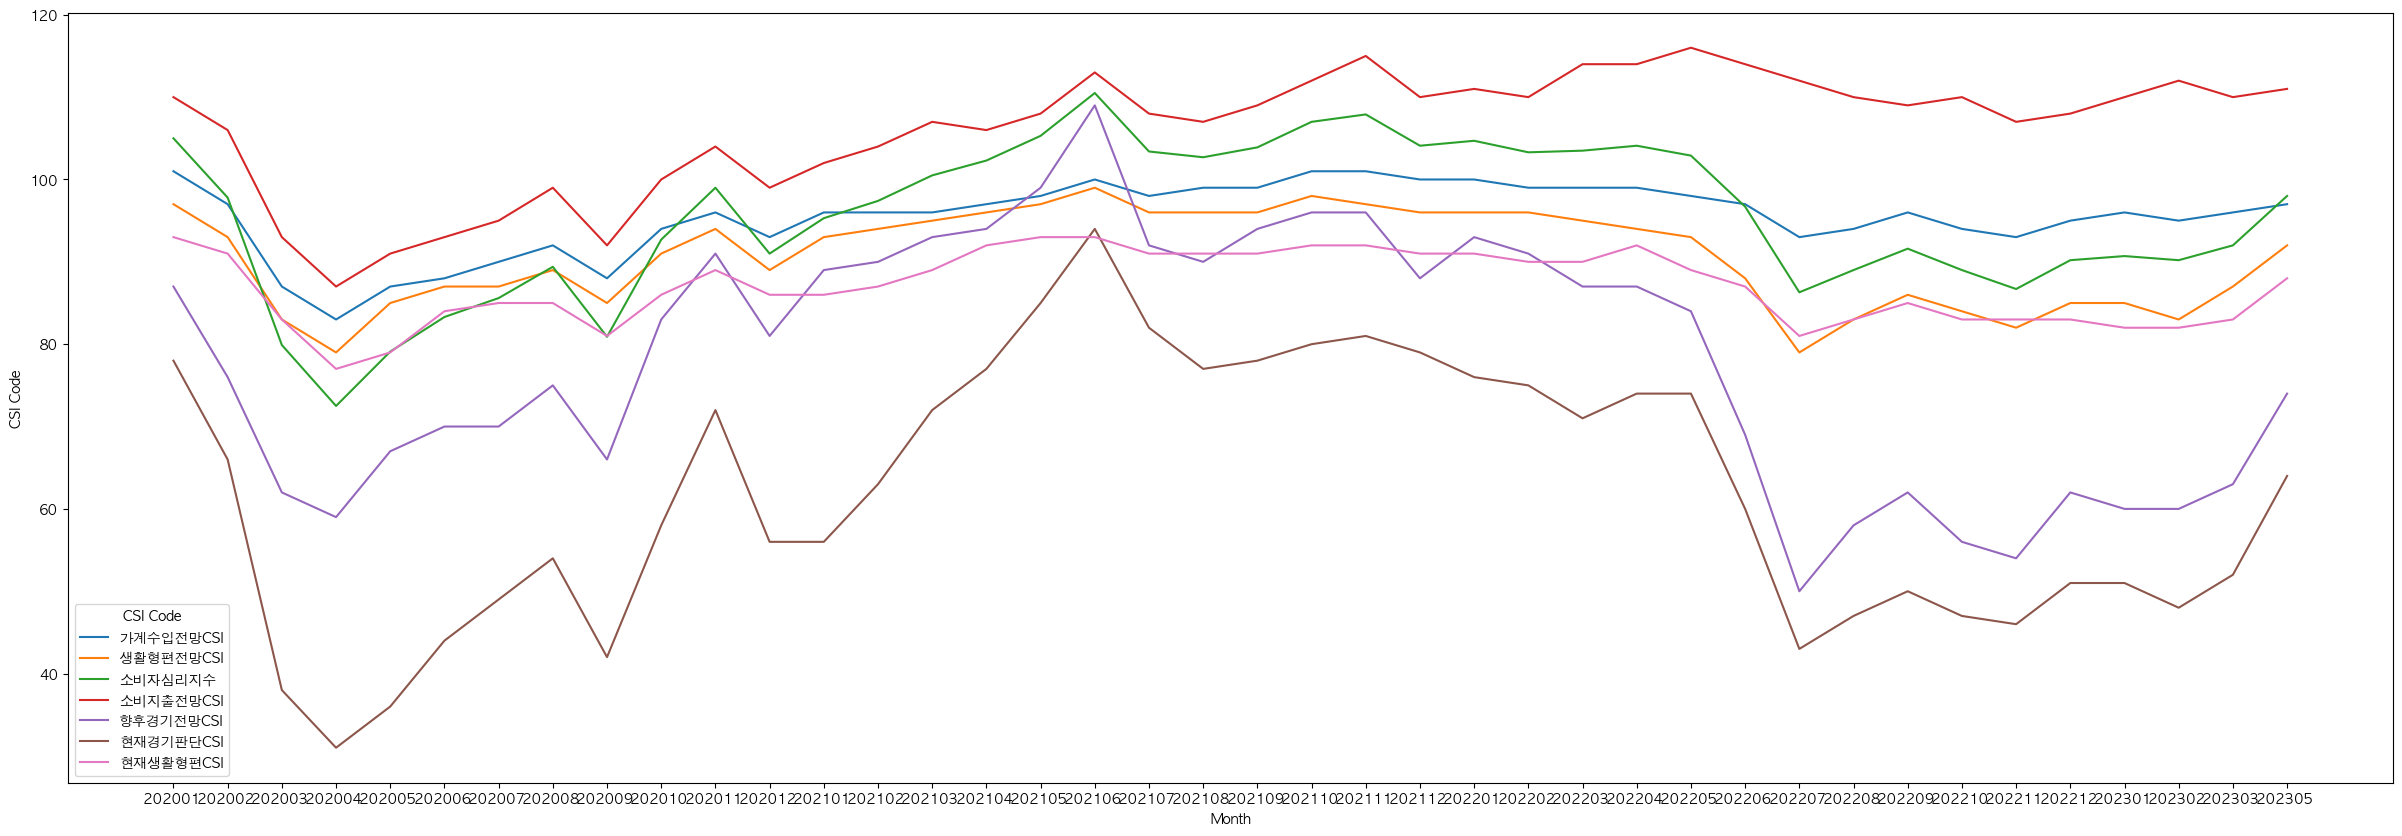

In [142]:
# CSI 코드별로 시각화
plt.figure(figsize=(30,10))
for csi_code in filtered_csi_all['CSI코드별']:
    plt.plot(filtered_csi_all.columns[1:], filtered_csi_all.loc[csi_all['CSI코드별'] == csi_code].values[0][1:], label=get_key_from_value(csi_dict,csi_code))

plt.xlabel('Month')
plt.ylabel('CSI Code')
plt.legend(title='CSI Code')
# plt.figure(figsize=(20,10))
plt.show()

현재생활형편 : 6개월 전과 비교한 현재  <br>
생활형편전망 : 현재와 비교한 6개월 후 전망  <br>
가계수입전망 :현재와 비교한 6개월 후 전망 <br>
소비지출전망 :현재와 비교한 6개월 후 전망 <br>
소비지출전망의 경우 지출 품목별(내구재, 의류비, 외식비, 여행비, 교육비, 의료‧보건비, 교양‧오락‧ 문화생활비, 교통비 및 통신비, 주거비 총 9개 항목)로도 설문 <br>
현재경기판단 6개월 전과 비교한 현재 <br>
향후경기전망 현재와 비교한 6개월 후 전망 <br>


 기대인플레이션 : 향후 1년간 소비자물가상승률 전망 <br>
 물가상승기대 형성 요인 부가조사(농축수산물, 석유류제품 등 6개 항목) <br>

In [143]:
prices_df.set_index(prices_df['품목'],inplace=True)
prices_df.drop('품목',axis=1,inplace=True)

KeyError: '품목'

In [144]:
prices_df

,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
품목,,,,,,,,,,,,,,,,,,,,,
쌀,97.09,96.28,96.80,95.61,97.48,97.21,98.49,100.79,105.70,108.01,...,95.25,93.16,91.26,89.67,88.25,93.14,92.39,92.25,92.96,92.31
돼지고기,82.09,89.98,93.91,105.05,108.84,108.37,108.25,104.54,108.15,101.99,...,136.05,128.35,123.99,129.11,121.75,119.17,118.89,117.37,110.47,109.06
국산쇠고기,97.24,96.32,97.99,98.46,101.79,100.46,100.67,102.90,102.99,102.03,...,108.50,109.27,109.06,111.69,111.68,109.53,107.47,107.84,102.98,101.49
우유,100.03,100.03,100.03,100.10,100.10,99.69,99.94,99.94,100.05,100.05,...,107.27,107.02,106.87,106.96,107.08,107.08,115.89,116.30,116.55,116.55
라면,98.30,100.81,101.27,101.43,100.67,100.14,100.09,100.49,99.24,98.67,...,108.74,109.79,109.83,113.22,124.14,121.59,121.90,123.20,123.39,122.34
스낵과자,98.65,99.22,99.78,100.99,99.86,97.20,98.37,100.37,101.29,101.16,...,106.95,107.13,107.08,107.13,115.07,115.90,116.21,116.84,116.53,115.59
달걀,97.49,102.43,103.22,99.52,99.28,95.95,97.39,101.88,102.80,99.91,...,136.93,137.38,135.93,138.12,134.62,138.31,138.79,133.89,129.19,126.84
닭고기,101.28,102.32,99.08,99.32,98.53,98.43,99.17,103.22,100.04,99.18,...,121.38,124.25,123.80,120.08,115.86,118.16,129.36,131.98,127.62,127.54
두부,99.62,99.68,99.83,99.69,99.67,100.63,100.09,99.25,100.30,100.84,...,117.07,116.99,116.15,115.53,116.42,117.79,121.63,124.01,124.04,121.74


In [38]:
prices_df_T=prices_df.T.reset_index(drop=True)
prices_df_T

품목,쌀,돼지고기,국산쇠고기,우유,라면,스낵과자,달걀,닭고기,두부,마른멸치,...,감기약,휘발유,시내버스료,도시철도료,휴대전화료,영화관람료,삼겹살(외식),설렁탕,미용료,목욕료
0,97.09,82.09,97.24,100.03,98.30,98.65,97.49,101.28,99.62,100.03,...,99.98,110.49,100.0,100.0,102.37,97.51,100.22,99.70,100.88,99.30
1,96.28,89.98,96.32,100.03,100.81,99.22,102.43,102.32,99.68,100.01,...,99.98,106.89,100.0,100.0,102.30,97.51,100.22,99.70,100.88,99.30
2,96.80,93.91,97.99,100.03,101.27,99.78,103.22,99.08,99.83,99.68,...,99.98,98.20,100.0,100.0,102.22,97.51,100.22,99.70,99.76,99.30
3,95.61,105.05,98.46,100.10,101.43,100.99,99.52,99.32,99.69,99.93,...,99.98,91.35,100.0,100.0,102.15,97.51,99.65,99.70,99.76,100.20
4,97.48,108.84,101.79,100.10,100.67,99.86,99.28,98.53,99.67,99.73,...,99.98,95.42,100.0,100.0,102.06,97.51,99.65,99.70,99.76,100.20
5,97.21,108.37,100.46,99.69,100.14,97.20,95.95,98.43,100.63,99.89,...,99.98,98.54,100.0,100.0,101.93,97.51,99.65,99.70,99.76,100.20
6,98.49,108.25,100.67,99.94,100.09,98.37,97.39,99.17,100.09,99.99,...,99.98,98.81,100.0,100.0,101.83,97.51,99.65,99.70,99.76,100.20
7,100.79,104.54,102.90,99.94,100.49,100.37,101.88,103.22,99.25,99.60,...,99.98,98.41,100.0,100.0,101.72,97.51,100.14,99.70,99.76,100.20
8,105.70,108.15,102.99,100.05,99.24,101.29,102.80,100.04,100.30,100.12,...,99.98,96.98,100.0,100.0,80.58,104.49,100.14,99.70,99.76,100.20
9,108.01,101.99,102.03,100.05,98.67,101.16,99.91,99.18,100.84,100.12,...,99.98,95.55,100.0,100.0,99.43,106.77,100.14,101.52,99.93,100.20


In [39]:
selected_columns =prices_df_T.columns

In [40]:
prices_df_T_corr=prices_df_T.corr().fillna(0)

/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


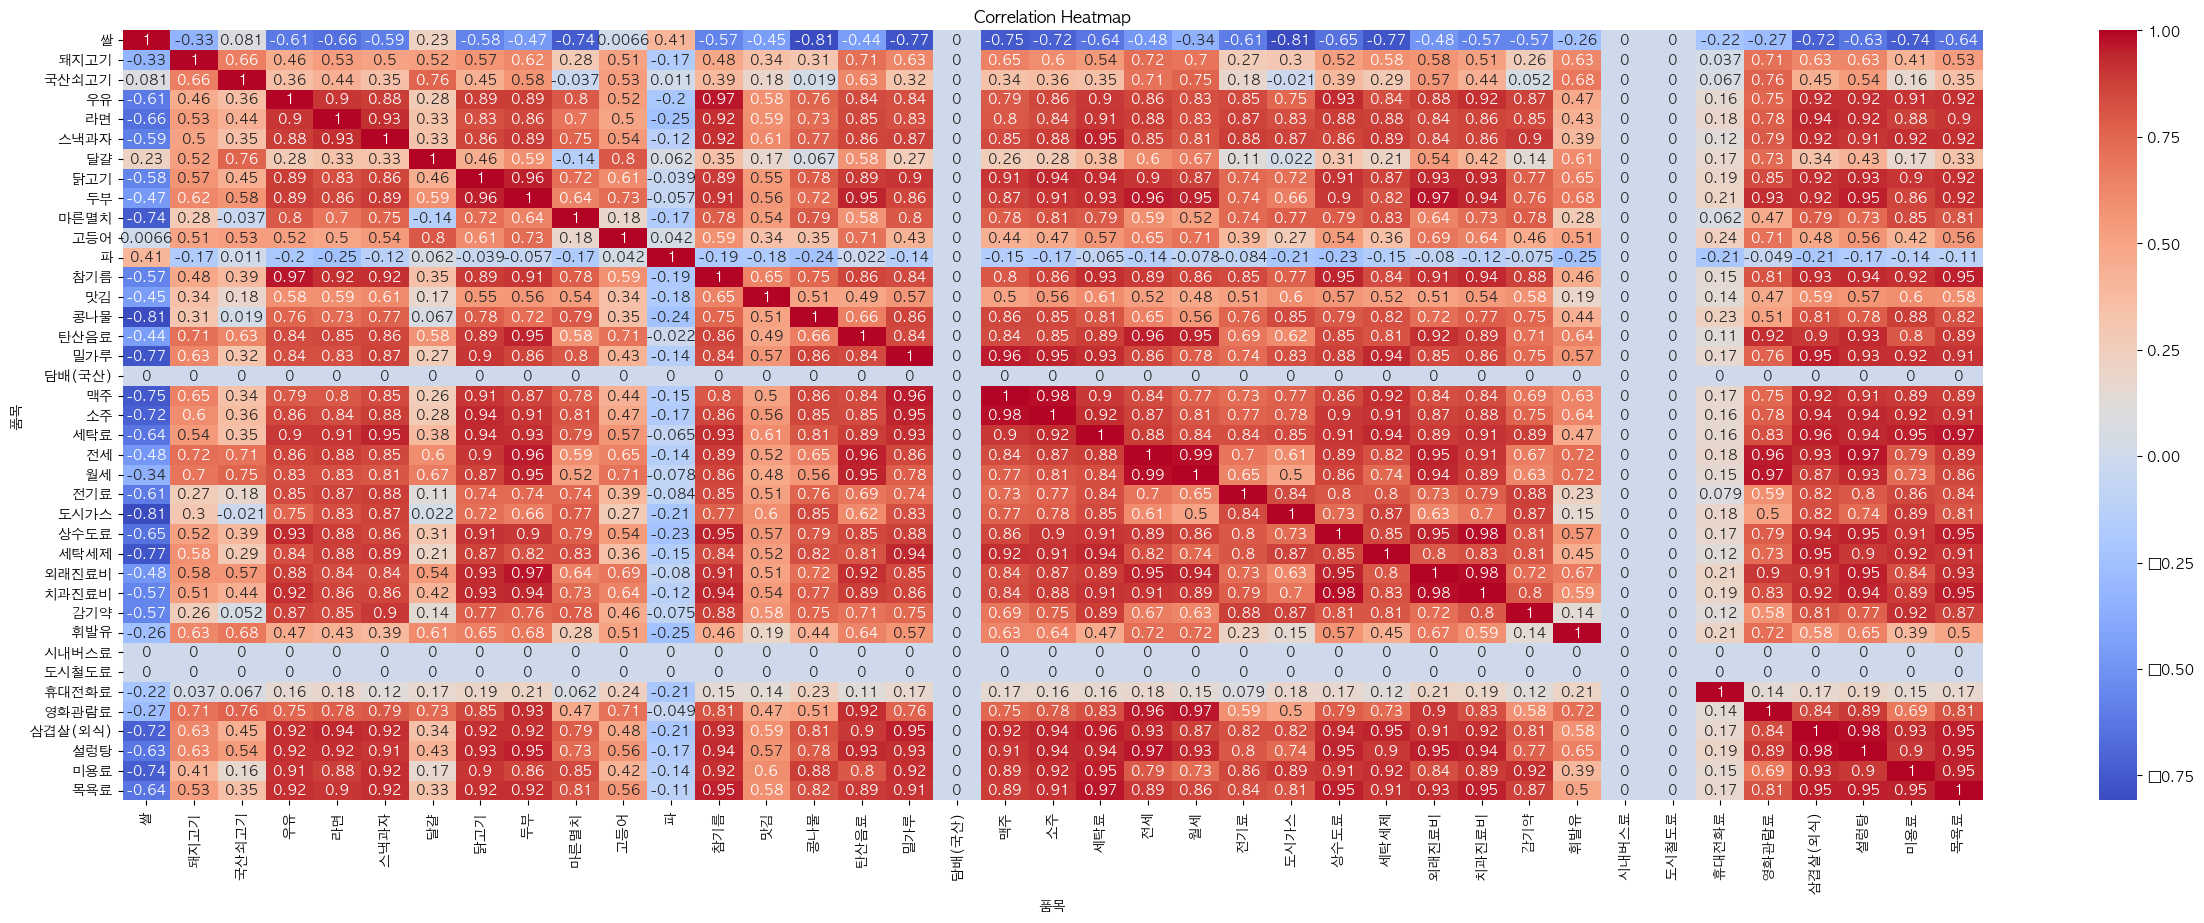

In [41]:
plt.figure(figsize=(30, 10))
sns.heatmap(prices_df_T_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
k = 3  # 클러스터 개수 지정
kmeans = KMeans(n_clusters=k)
kmeans.fit(prices_df_T_corr)
labels = kmeans.labels_
clusters = pd.DataFrame({'품목': prices_df_T_corr.index, '클러스터': labels})
print(clusters)

         품목  클러스터
0         쌀     2
1      돼지고기     0
2     국산쇠고기     0
3        우유     1
4        라면     1
5      스낵과자     1
6        달걀     0
7       닭고기     1
8        두부     1
9      마른멸치     1
10      고등어     0
11        파     2
12      참기름     1
13       맛김     0
14      콩나물     1
15     탄산음료     1
16      밀가루     1
17   담배(국산)     2
18       맥주     1
19       소주     1
20      세탁료     1
21       전세     1
22       월세     1
23      전기료     1
24     도시가스     1
25     상수도료     1
26     세탁세제     1
27    외래진료비     1
28    치과진료비     1
29      감기약     1
30      휘발유     0
31    시내버스료     2
32    도시철도료     2
33    휴대전화료     2
34    영화관람료     1
35  삼겹살(외식)     1
36      설렁탕     1
37      미용료     1
38      목욕료     1


/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
item_character_value_df

,품목성질별,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
0,총지수,100.16,99.94,99.50,99.44,99.71,99.63,100.19,100.74,100.18,...,108.22,108.74,108.62,108.93,109.21,109.10,109.28,110.10,110.38,110.56
1,상품,100.35,100.08,99.04,98.89,99.41,99.04,99.91,101.34,101.33,...,111.04,111.62,110.92,111.67,111.98,111.73,111.83,112.77,112.84,112.95
2,농축수산물,94.73,96.57,95.78,96.98,97.40,98.45,103.30,108.68,108.45,...,111.80,114.40,116.74,118.99,114.68,109.78,110.64,113.60,112.96,113.15
3,공업제품,101.40,100.61,99.42,98.93,99.54,99.92,99.89,99.77,99.81,...,111.19,111.46,109.95,109.68,110.15,110.99,110.91,110.90,111.13,111.24
4,전기 · 가스 · 수도,103.39,103.22,103.13,103.13,103.05,91.60,91.82,99.32,99.33,...,107.66,106.48,106.55,113.96,123.94,123.94,124.02,129.72,129.78,129.79
5,서비스,99.98,99.82,99.91,99.92,99.98,100.15,100.44,100.22,99.17,...,105.75,106.22,106.60,106.53,106.78,106.79,107.05,107.76,108.23,108.47
6,집세,99.81,99.83,99.86,99.88,99.91,99.96,100.03,100.09,100.19,...,103.22,103.33,103.45,103.58,103.65,103.77,103.84,103.91,103.90,103.85
7,공공서비스,100.76,100.61,100.59,100.46,100.42,100.47,100.60,100.31,95.11,...,101.71,101.81,101.83,101.72,101.71,101.72,101.82,102.63,102.73,102.69
8,개인서비스,99.72,99.49,99.65,99.71,99.81,100.09,100.51,100.22,100.53,...,108.23,108.97,109.58,109.47,109.88,109.86,110.24,111.12,111.88,112.34


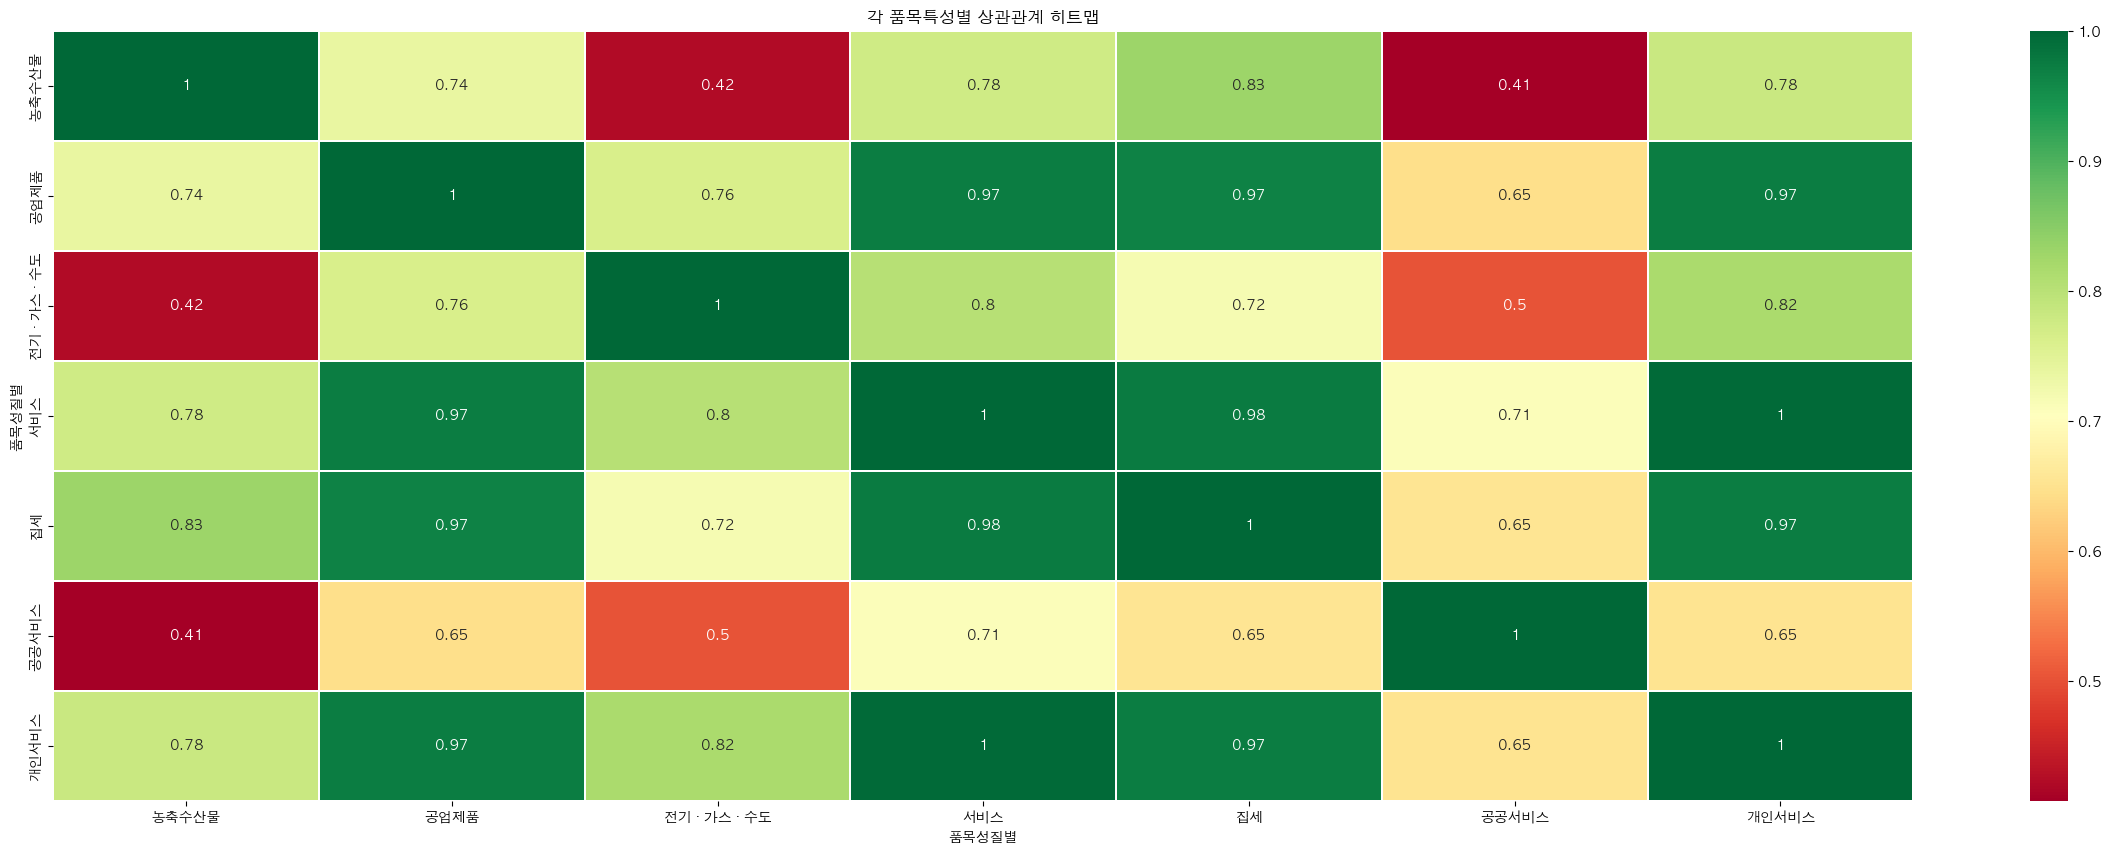

In [44]:
correlation_matrix = item_character_df.transpose().corr()
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title('각 품목특성별 상관관계 히트맵')
plt.show()

In [45]:
item_character_value_df_t = item_character_value_df.T
item_character_value_df_t.columns=item_character_value_df_t.loc['품목성질별']
item_character_value_df_t.drop('품목성질별',axis=0,inplace=True)
item_character_value_df_t.drop(['총지수','상품'],axis=1,inplace=True)
# item_character_value_df_t.reset_index(drop=True,inplace=True)
item_character_value_df_t

품목성질별,농축수산물,공업제품,전기 · 가스 · 수도,서비스,집세,공공서비스,개인서비스
202002,94.73,101.4,103.39,99.98,99.81,100.76,99.72
202003,96.57,100.61,103.22,99.82,99.83,100.61,99.49
202004,95.78,99.42,103.13,99.91,99.86,100.59,99.65
202005,96.98,98.93,103.13,99.92,99.88,100.46,99.71
202006,97.4,99.54,103.05,99.98,99.91,100.42,99.81
202007,98.45,99.92,91.6,100.15,99.96,100.47,100.09
202008,103.3,99.89,91.82,100.44,100.03,100.6,100.51
202009,108.68,99.77,99.32,100.22,100.09,100.31,100.22
202010,108.45,99.81,99.33,99.17,100.19,95.11,100.53
202011,101.74,99.61,99.33,100.19,100.28,99.72,100.35


In [46]:
item_0=item_character_value_df_t['농축수산물']
item_1=item_character_value_df_t['공업제품']
item_2=item_character_value_df_t['전기 · 가스 · 수도']
item_3=item_character_value_df_t['서비스']
item_4=item_character_value_df_t['집세']
item_5=item_character_value_df_t['공공서비스']
item_6=item_character_value_df_t['개인서비스']
item_0

202002     94.73
202003     96.57
202004     95.78
202005     96.98
202006      97.4
202007     98.45
202008     103.3
202009    108.68
202010    108.45
202011    101.74
202012     102.3
202101     105.7
202102    109.97
202103    109.41
202104     108.4
202105    107.94
202106    106.63
202107    106.81
202108    109.06
202109    112.01
202110    109.01
202111    109.47
202112     110.3
202201    112.31
202202    111.72
202203    109.89
202204    110.42
202205    112.45
202206     111.8
202207     114.4
202208    116.74
202209    118.99
202210    114.68
202211    109.78
202212    110.64
202301     113.6
202302    112.96
202303    113.15
Name: 농축수산물, dtype: object

In [47]:
filtered_csi_all_T=filtered_csi_all.T
filtered_csi_all_T.drop('CSI코드별',axis=0,inplace=True)
filtered_csi_all_T.index = filtered_csi_all_T.index.str.replace(' ', '')

In [48]:
filtered_csi_all_T

,1,9,10,11,20,23,24
202002,97.0,93.0,97.8,106.0,76.0,66.0,91.0
202003,87.0,83.0,79.9,93.0,62.0,38.0,83.0
202004,83.0,79.0,72.5,87.0,59.0,31.0,77.0
202005,87.0,85.0,79.1,91.0,67.0,36.0,79.0
202006,88.0,87.0,83.3,93.0,70.0,44.0,84.0
202007,90.0,87.0,85.6,95.0,70.0,49.0,85.0
202008,92.0,89.0,89.4,99.0,75.0,54.0,85.0
202009,88.0,85.0,80.9,92.0,66.0,42.0,81.0
202010,94.0,91.0,92.7,100.0,83.0,58.0,86.0
202011,96.0,94.0,99.0,104.0,91.0,72.0,89.0


In [49]:
item_character_value_df_t['농축수산물']

202002     94.73
202003     96.57
202004     95.78
202005     96.98
202006      97.4
202007     98.45
202008     103.3
202009    108.68
202010    108.45
202011    101.74
202012     102.3
202101     105.7
202102    109.97
202103    109.41
202104     108.4
202105    107.94
202106    106.63
202107    106.81
202108    109.06
202109    112.01
202110    109.01
202111    109.47
202112     110.3
202201    112.31
202202    111.72
202203    109.89
202204    110.42
202205    112.45
202206     111.8
202207     114.4
202208    116.74
202209    118.99
202210    114.68
202211    109.78
202212    110.64
202301     113.6
202302    112.96
202303    113.15
Name: 농축수산물, dtype: object

In [50]:
filtered_csi_all_T.columns

Index([1, 9, 10, 11, 20, 23, 24], dtype='int64')

In [51]:
get_key_from_value(csi_dict,10)

'소비자심리지수'

In [52]:
filtered_csi_all_T.columns

Index([1, 9, 10, 11, 20, 23, 24], dtype='int64')

In [53]:
item_character_value_df_t.columns

Index(['농축수산물', '공업제품', '전기 · 가스 · 수도', '서비스', '집세', '공공서비스', '개인서비스'], dtype='object', name='품목성질별')

/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


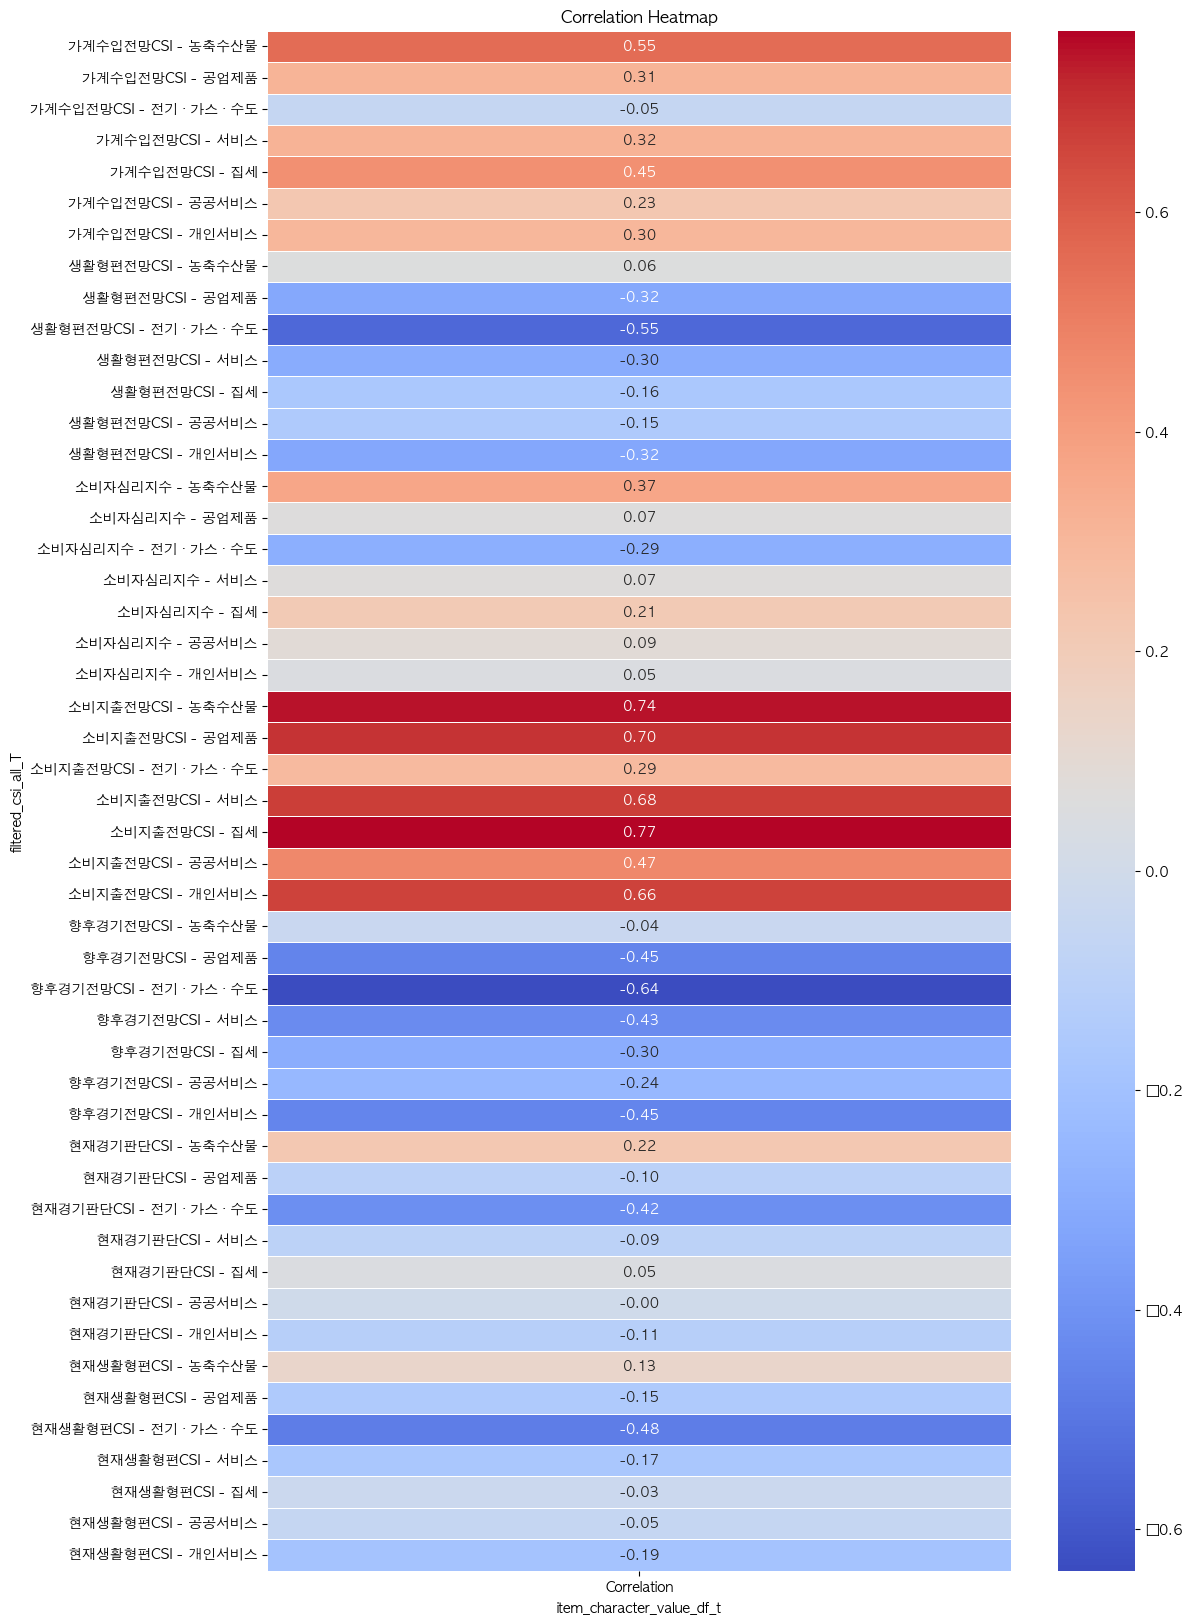

In [54]:

# 데이터프레임의 상관관계 계산 함수

def calculate_correlations(df1, df2):
    correlations = {}
    for col1 in df1.columns:
        for col2 in df2.columns:
            # 데이터프레임 열의 데이터 유형 확인
            if pd.api.types.is_numeric_dtype(df1[col1]) and pd.api.types.is_numeric_dtype(df2[col2]):
                correlation = df1[col1].corr(df2[col2])
            else:
                # 실수(float)로 변환
                df1_col = pd.to_numeric(df1[col1], errors='coerce')
                df2_col = pd.to_numeric(df2[col2], errors='coerce')
                correlation = df1_col.corr(df2_col)
            correlations[f'{get_key_from_value(csi_dict,col1)} - {col2}'] = correlation
    return correlations

# 상관관계 계산
correlations = calculate_correlations(filtered_csi_all_T, item_character_value_df_t)

# 상관관계를 데이터프레임으로 변환
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# 히트맵 시각화
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xlabel('item_character_value_df_t')
plt.ylabel('filtered_csi_all_T')
plt.show()

현재생활형편 : 6개월 전과 비교한 현재  <br>
생활형편전망 : 현재와 비교한 6개월 후 전망  <br>
가계수입전망 :현재와 비교한 6개월 후 전망 <br>
소비지출전망 :현재와 비교한 6개월 후 전망 <br>
소비지출전망의 경우 지출 품목별(내구재, 의류비, 외식비, 여행비, 교육비, 의료‧보건비, 교양‧오락‧ 문화생활비, 교통비 및 통신비, 주거비 총 9개 항목)로도 설문 <br>
현재경기판단 6개월 전과 비교한 현재 <br>
향후경기전망 현재와 비교한 6개월 후 전망 <br>


 기대인플레이션 : 향후 1년간 소비자물가상승률 전망 <br>
 물가상승기대 형성 요인 부가조사(농축수산물, 석유류제품 등 6개 항목) <br>

In [55]:
filtered_csi_all_T[10]

202002     97.8
202003     79.9
202004     72.5
202005     79.1
202006     83.3
202007     85.6
202008     89.4
202009     80.9
202010     92.7
202011     99.0
202012     91.0
202101     95.3
202102     97.4
202103    100.5
202104    102.3
202105    105.3
202106    110.5
202107    103.4
202108    102.7
202109    103.9
202110    107.0
202111    107.9
202112    104.1
202201    104.7
202202    103.3
202203    103.5
202204    104.1
202205    102.9
202206     96.7
202207     86.3
202208     89.0
202209     91.6
202210     89.0
202211     86.7
202212     90.2
202301     90.7
202302     90.2
202303     92.0
Name: 10, dtype: float64

In [56]:
new_prices_df=prices_df.T

In [57]:
new_prices_df['소비자심리지수']=filtered_csi_all_T[10]

In [58]:
a=prices_df.T

In [59]:
b=pd.DataFrame(filtered_csi_all_T[10])

In [60]:
b=b.rename(columns={10:"소비자심리지수"})

In [61]:
df_combined = pd.concat([a, b], axis=1)

In [62]:
correlation_matrix=df_combined.corr()

/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


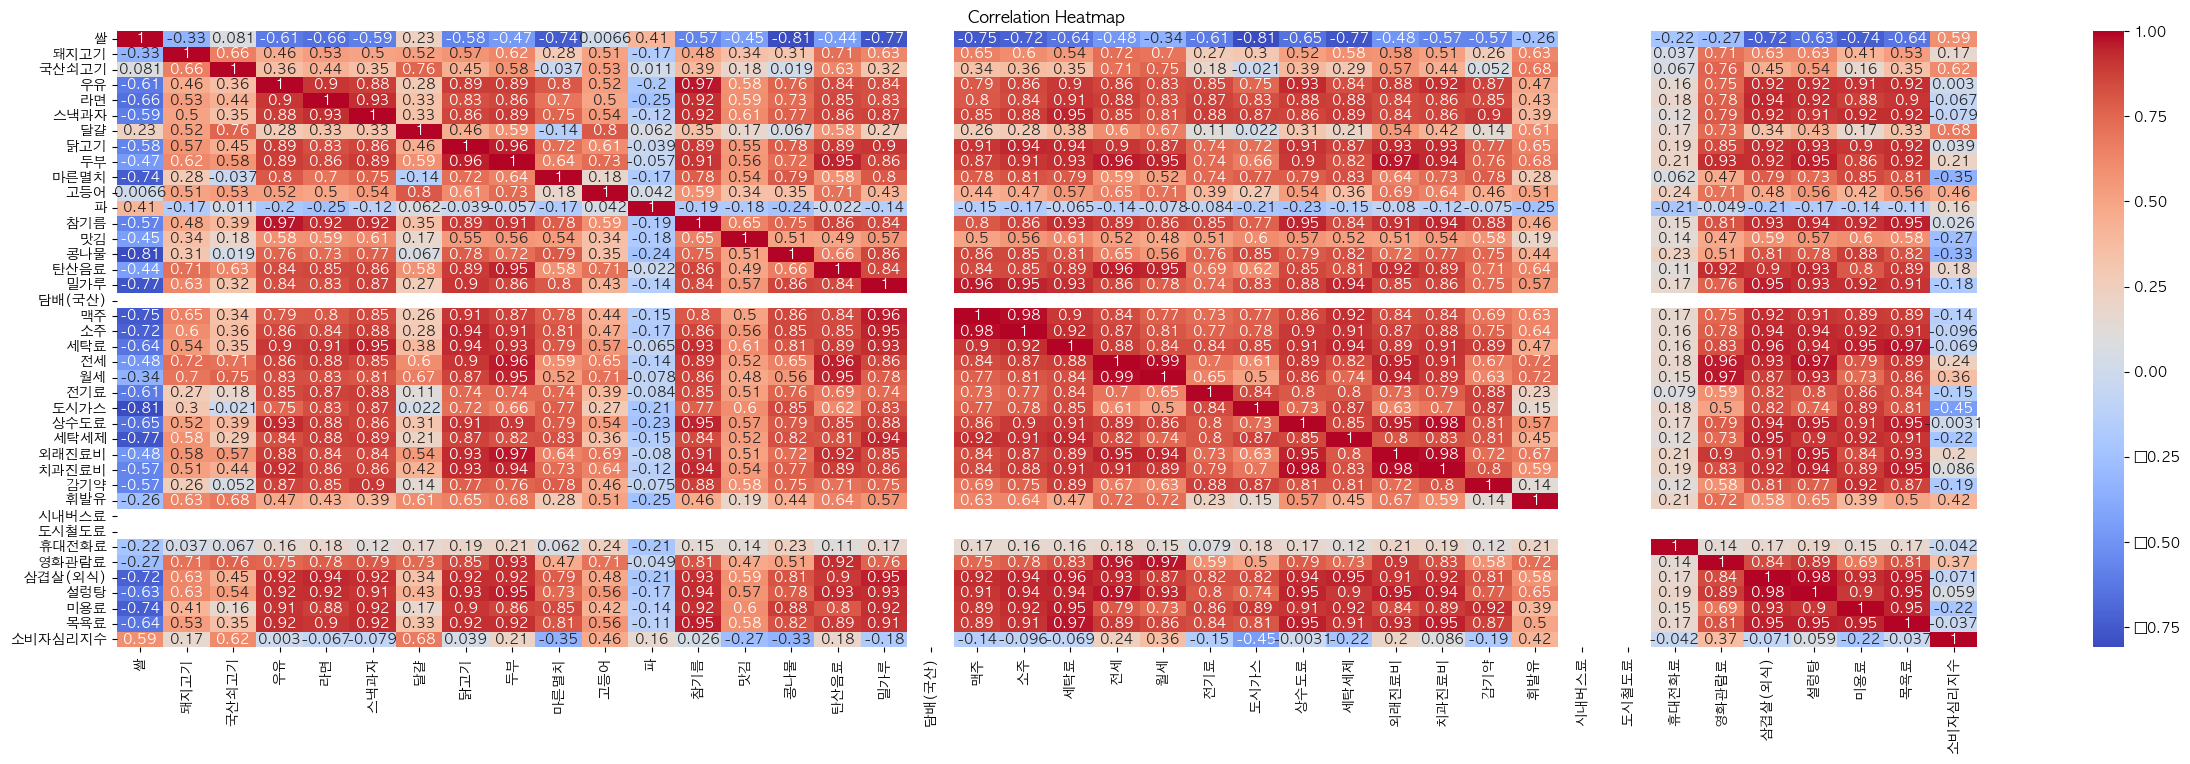

In [63]:
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [64]:
item_character_value_df.index=item_character_value_df['품목성질별']

In [65]:
c=item_character_value_df.drop('품목성질별',axis=1)

In [66]:
c=c.T

In [67]:
df_combined = pd.concat([b, c], axis=1)

In [101]:
total_sales_df=pd.read_csv('/Users/songsiho/Desktop/4/data_science/project/project/dataset/total_sales.csv',encoding='cp949')

In [102]:
total_sales_df=total_sales_df.loc[0:35]
total_sales_df.set_index('계정항목별',inplace=True)


In [103]:
total_sales_df_total=total_sales_df[total_sales_df['금융기관 유형코드별']=='합계']
total_sales_df_bank=total_sales_df[total_sales_df['금융기관 유형코드별']=='은행계']
total_sales_df_nobank=total_sales_df[total_sales_df['금융기관 유형코드별']=='비은행계']

In [104]:
total_sales_df_total.drop('금융기관 유형코드별',axis=1,inplace=True) #금융기관 유형코드별 == 합계
total_sales_df_bank.drop('금융기관 유형코드별',axis=1,inplace=True) #금융기관 유형코드별 == 은행계
total_sales_df_nobank.drop('금융기관 유형코드별',axis=1,inplace=True) #금융기관 유형코드별 == 비은행계

/var/folders/y1/08kzpz3x6_n3fkyg8spwflyc0000gn/T/ipykernel_24193/3151092598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_sales_df_total.drop('금융기관 유형코드별',axis=1,inplace=True) #금융기관 유형코드별 == 합계
/var/folders/y1/08kzpz3x6_n3fkyg8spwflyc0000gn/T/ipykernel_24193/3151092598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_sales_df_bank.drop('금융기관 유형코드별',axis=1,inplace=True) #금융기관 유형코드별 == 은행계
/var/folders/y1/08kzpz3x6_n3fkyg8spwflyc0000gn/T/ipykernel_24193/3151092598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [105]:
total_sales_df_total_T=total_sales_df_total.T
total_sales_df_bank_T=total_sales_df_bank.T
total_sales_df_nobank_T=total_sales_df_nobank.T

In [106]:
def min_max_normalized(df):
    normalized_df=(df - df.min()) / (df.max() - df.min())
    return normalized_df

In [109]:
# normalized_A = (A - A.min()) / (A.max() - A.min())
# normalized_B = (B - B.min()) / (B.max() - B.min())


In [232]:
total_sales_df_total_T.head()

계정항목별,전체 이용건수 (천건),개인 이용건수 (천건),개인 일반구매 이용건수 (천건),개인 할부구매 이용건수 (천건),개인 현금서비스 이용건수 (천건),법인 이용건수 (천건),전체 이용금액 (백만원),개인 이용금액 (백만원),개인 일반구매 이용금액 (백만원),개인 할부구매 이용금액 (백만원),개인 현금서비스 이용금액 (백만원),법인 이용금액 (백만원)
2020.01,1235277,1145817,1104642,35060,6116,89460,67154607,54217410,38427186,10992495,4797728,12937197
2020.02,1103517,1017502,981542,30056,5903,86016,59686650,47456178,33470170,9163416,4822593,12230472
2020.03,1124803,1040816,1002266,32621,5929,83987,58844315,47842988,33537215,9299170,5006602,11001327
2020.04,1129783,1043333,1006283,31848,5202,86450,60385644,48165421,34256743,9545731,4362947,12220223
2020.05,1226171,1139001,1101262,32302,5437,87169,65011734,52246516,37940563,9813374,4492580,12765217


In [234]:
total_sales_df_total_T

계정항목별,전체 이용건수 (천건),개인 이용건수 (천건),개인 일반구매 이용건수 (천건),개인 할부구매 이용건수 (천건),개인 현금서비스 이용건수 (천건),법인 이용건수 (천건),전체 이용금액 (백만원),개인 이용금액 (백만원),개인 일반구매 이용금액 (백만원),개인 할부구매 이용금액 (백만원),개인 현금서비스 이용금액 (백만원),법인 이용금액 (백만원)
2020.01,1235277,1145817,1104642,35060,6116,89460,67154607,54217410,38427186,10992495,4797728,12937197
2020.02,1103517,1017502,981542,30056,5903,86016,59686650,47456178,33470170,9163416,4822593,12230472
2020.03,1124803,1040816,1002266,32621,5929,83987,58844315,47842988,33537215,9299170,5006602,11001327
2020.04,1129783,1043333,1006283,31848,5202,86450,60385644,48165421,34256743,9545731,4362947,12220223
2020.05,1226171,1139001,1101262,32302,5437,87169,65011734,52246516,37940563,9813374,4492580,12765217
2020.06,1240145,1147299,1109106,32863,5329,92846,64039367,51676859,37286494,9963721,4426644,12362507
2020.07,1254766,1153958,1114504,34080,5374,100808,66802467,53124206,37623749,11059844,4440614,13678261
2020.08,1243776,1152809,1114578,32952,5279,90967,64447280,51785217,37098223,10200371,4486623,12662064
2020.09,1188972,1096561,1056265,35276,5020,92411,66934921,52354938,37172476,10828941,4353521,14579983
2020.10,1221568,1129801,1089019,35596,5185,91767,66713031,52743573,37254433,10973437,4515702,13969458


In [111]:
consumer_value=pd.DataFrame(filtered_csi_all_T[10])

In [112]:
consumer_value.rename(columns={10:"소비자심리지수"},inplace=True)

In [113]:
consumer_value

,소비자심리지수
202002,97.8
202003,79.9
202004,72.5
202005,79.1
202006,83.3
202007,85.6
202008,89.4
202009,80.9
202010,92.7
202011,99.0


In [88]:
normalized_price_df_T=min_max_normalized(prices_df)

In [252]:
total_sales_df_total_price=total_sales_df_total.iloc[6:-1]
total_sales_df_total_price_T=total_sales_df_total_price.T
total_sales_df_total_price_T.iloc[1:]
# for i in item_price_values_df_percentage_T_percentage['0 총지수']:
    # for j in range(len(total_sales_df_total_price_T.index)):
        # print(j)
    # total_sales_df_total_price_T..iloc[1:]

계정항목별,전체 이용금액 (백만원),개인 이용금액 (백만원),개인 일반구매 이용금액 (백만원),개인 할부구매 이용금액 (백만원),개인 현금서비스 이용금액 (백만원)
2020.02,59686650,47456178,33470170,9163416,4822593
2020.03,58844315,47842988,33537215,9299170,5006602
2020.04,60385644,48165421,34256743,9545731,4362947
2020.05,65011734,52246516,37940563,9813374,4492580
2020.06,64039367,51676859,37286494,9963721,4426644
2020.07,66802467,53124206,37623749,11059844,4440614
2020.08,64447280,51785217,37098223,10200371,4486623
2020.09,66934921,52354938,37172476,10828941,4353521
2020.10,66713031,52743573,37254433,10973437,4515702
2020.11,66272495,53067009,37757608,10891032,4418369


In [253]:
item_price_values_df_percentage_T_percentage['0 총지수']

2020.01    0.0009
2020.02    0.0016
2020.03   -0.0006
2020.04   -0.0050
2020.05   -0.0056
2020.06   -0.0029
2020.07   -0.0037
2020.08    0.0019
2020.09    0.0074
2020.10    0.0018
2020.11    0.0009
2020.12    0.0033
2021.01    0.0104
2021.02    0.0158
2021.03    0.0184
2021.04    0.0198
2021.05    0.0205
2021.06    0.0205
2021.07    0.0226
2021.08    0.0275
2021.09    0.0317
2021.10    0.0335
2021.11    0.0387
2021.12    0.0404
2022.01    0.0469
2022.02    0.0530
2022.03    0.0606
2022.04    0.0685
2022.05    0.0756
2022.06    0.0822
2022.07    0.0874
2022.08    0.0862
2022.09    0.0893
2022.10    0.0921
2022.11    0.0910
2022.12    0.0928
2023.01    0.1010
2023.02    0.1038
2023.03    0.1056
2023.04    0.1080
Name: 0 총지수, dtype: float64

In [255]:
def multiply_values(row, values_list):
    return row * values_list


In [263]:
b=item_price_values_df_percentage_T_percentage['0 총지수']
b

2020.01    0.0009
2020.02    0.0016
2020.03   -0.0006
2020.04   -0.0050
2020.05   -0.0056
2020.06   -0.0029
2020.07   -0.0037
2020.08    0.0019
2020.09    0.0074
2020.10    0.0018
2020.11    0.0009
2020.12    0.0033
2021.01    0.0104
2021.02    0.0158
2021.03    0.0184
2021.04    0.0198
2021.05    0.0205
2021.06    0.0205
2021.07    0.0226
2021.08    0.0275
2021.09    0.0317
2021.10    0.0335
2021.11    0.0387
2021.12    0.0404
2022.01    0.0469
2022.02    0.0530
2022.03    0.0606
2022.04    0.0685
2022.05    0.0756
2022.06    0.0822
2022.07    0.0874
2022.08    0.0862
2022.09    0.0893
2022.10    0.0921
2022.11    0.0910
2022.12    0.0928
2023.01    0.1010
2023.02    0.1038
2023.03    0.1056
2023.04    0.1080
Name: 0 총지수, dtype: float64

In [265]:
a=total_sales_df_total_price_T.iloc[:]
a.index

Index(['2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06',
       '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12',
       '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06',
       '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
       '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06',
       '2022.07', '2022.08', '2022.09', '2022.10', '2022.11', '2022.12',
       '2023.01', '2023.02'],
      dtype='object')

In [262]:
result_df = total_sales_df_total_price_T.iloc[:].apply(multiply_values, args=(item_price_values_df_percentage_T_percentage['0 총지수']), axis=1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [257]:
result_df

,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,...,2022.12,2023.01,2023.02,2023.03,2023.04,개인 이용금액 (백만원),개인 일반구매 이용금액 (백만원),개인 할부구매 이용금액 (백만원),개인 현금서비스 이용금액 (백만원),전체 이용금액 (백만원)
2020.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
len(total_sales_df_total_price_T.index)

38

,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,...,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02
계정항목별,,,,,,,,,,,,,,,,,,,,,
전체 이용금액 (백만원),67154607,59686650,58844315,60385644,65011734,64039367,66802467,64447280,66934921,66713031,...,84787819,79395263,82207664,81112499,82343480,83378034,80536440,84793096,80255412,75947115
개인 이용금액 (백만원),54217410,47456178,47842988,48165421,52246516,51676859,53124206,51785217,52354938,52743573,...,64933419,62871749,65806421,65000559,63882023,66388297,65224427,66883892,65249137,61364252
개인 일반구매 이용금액 (백만원),38427186,33470170,33537215,34256743,37940563,37286494,37623749,37098223,37172476,37254433,...,47523800,45899455,47711654,47700792,46248330,47820124,47497499,48896098,47712025,45244797
개인 할부구매 이용금액 (백만원),10992495,9163416,9299170,9545731,9813374,9963721,11059844,10200371,10828941,10973437,...,12509073,12223319,13363974,12379037,12715849,13595914,12778240,13042335,12904639,11645579
개인 현금서비스 이용금액 (백만원),4797728,4822593,5006602,4362947,4492580,4426644,4440614,4486623,4353521,4515702,...,4900547,4748975,4730793,4920730,4917844,4972259,4948688,4945460,4632473,4473876


In [236]:
item_price_values_df_percentage_T_percentage

지출목적별,0 총지수,01 식료품 및 비주류음료,02 주류 및 담배,03 의류 및 신발,"04 주택, 수도, 전기 및 연료",05 가정용품 및 가사 서비스,06 보건,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
2020.01,0.0009,-0.0284,0.0017,-0.0038,0.0017,-0.0046,0.0040,0.0509,0.0075,0.0012,-0.0014,-0.0028,-0.0060
2020.02,0.0016,-0.0334,0.0019,-0.0022,0.0076,0.0033,0.0031,0.0506,0.0070,-0.0017,0.0004,-0.0035,-0.0026
2020.03,-0.0006,-0.0194,-0.0015,-0.0021,0.0068,-0.0023,0.0036,0.0188,0.0066,-0.0060,0.0003,-0.0050,-0.0034
2020.04,-0.0050,-0.0235,-0.0017,-0.0062,0.0056,-0.0014,0.0034,-0.0172,0.0129,-0.0029,0.0006,-0.0042,-0.0056
2020.05,-0.0056,-0.0155,-0.0005,-0.0006,0.0020,0.0019,0.0036,-0.0394,0.0125,0.0002,-0.0003,-0.0021,-0.0016
2020.06,-0.0029,-0.0132,-0.0005,-0.0006,0.0029,-0.0020,0.0080,-0.0237,0.0184,-0.0016,0.0001,-0.0012,-0.0003
2020.07,-0.0037,-0.0085,-0.0002,0.0026,-0.0186,-0.0008,-0.0016,-0.0038,0.0176,0.0023,0.0008,0.0012,0.0021
2020.08,0.0019,0.0180,-0.0002,0.0025,-0.0154,0.0022,-0.0024,-0.0017,0.0169,0.0069,0.0017,0.0039,0.0011
2020.09,0.0074,0.0479,0.0008,0.0027,-0.0003,-0.0056,-0.0069,-0.0060,0.0162,0.0003,-0.0013,0.0021,0.0087
2020.10,0.0018,0.0485,0.0014,0.0017,0.0026,0.0042,-0.0038,-0.0095,-0.1222,0.0033,-0.0010,0.0043,0.0016


In [211]:
total_sales_df_total_price_T_min_max=min_max_normalized(total_sales_df_total_price_T)

In [228]:
total_sales_df_total_price_T_min_max

계정항목별,전체 이용금액 (백만원),개인 이용금액 (백만원),개인 일반구매 이용금액 (백만원),개인 할부구매 이용금액 (백만원),개인 현금서비스 이용금액 (백만원)
2020.01,0.320258,0.348020,0.321343,0.412652,0.789386
2020.02,0.032461,0.000000,0.000000,0.000000,0.814458
2020.03,0.000000,0.019910,0.004346,0.030627,1.000000
2020.04,0.059399,0.036507,0.050990,0.086253,0.350983
2020.05,0.237677,0.246572,0.289797,0.146635,0.481696
2020.06,0.200204,0.217251,0.247397,0.180554,0.415211
2020.07,0.306687,0.291750,0.269260,0.427846,0.429297
2020.08,0.215924,0.222828,0.235192,0.233944,0.475690
2020.09,0.311791,0.252153,0.240005,0.375753,0.341479
2020.10,0.303240,0.272157,0.245318,0.408352,0.505011


In [91]:
pwd

'/Users/songsiho/Desktop/4/data_science/project/project'

In [93]:
item_price_values_df = pd.read_csv("./dataset/item_price_values.csv",encoding="cp949")

In [95]:
item_price_values_df.set_index("지출목적별",inplace=True)

In [97]:
item_price_values_df.drop("시도별",axis=1,inplace=True)

In [98]:
item_price_values_df

,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,...,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04
지출목적별,,,,,,,,,,,,,,,,,,,,,
0 총지수,100.09,100.16,99.94,99.50,99.44,99.71,99.63,100.19,100.74,100.18,...,108.74,108.62,108.93,109.21,109.10,109.28,110.10,110.38,110.56,110.80
01 식료품 및 비주류음료,97.16,96.66,98.06,97.65,98.45,98.68,99.15,101.80,104.79,104.85,...,113.12,114.69,116.30,114.77,112.41,113.49,115.40,115.84,116.34,115.67
02 주류 및 담배,100.17,100.19,99.85,99.83,99.95,99.95,99.98,99.98,100.08,100.14,...,103.08,103.17,103.00,103.08,103.04,103.09,103.00,103.22,103.30,103.32
03 의류 및 신발,99.62,99.78,99.79,99.38,99.94,99.94,100.26,100.25,100.27,100.17,...,103.59,103.69,103.71,103.93,107.33,107.56,107.86,107.94,108.28,108.30
"04 주택, 수도, 전기 및 연료",100.17,100.76,100.68,100.56,100.20,100.29,98.14,98.46,99.97,100.26,...,106.80,106.99,108.49,110.71,110.65,110.77,111.96,112.55,112.16,112.18
05 가정용품 및 가사 서비스,99.54,100.33,99.77,99.86,100.19,99.80,99.92,100.22,99.44,100.42,...,107.30,107.90,107.50,108.04,108.41,108.95,110.26,111.10,111.15,112.03
06 보건,100.40,100.31,100.36,100.34,100.36,100.80,99.84,99.76,99.31,99.62,...,100.65,100.82,100.61,101.09,101.12,101.07,102.16,102.29,102.30,102.01
07 교통,105.09,105.06,101.88,98.28,96.06,97.63,99.62,99.83,99.40,99.05,...,123.43,117.40,115.77,115.18,115.44,113.35,112.30,111.49,111.06,112.01
08 통신,100.75,100.70,100.66,101.29,101.25,101.84,101.76,101.69,101.62,87.78,...,99.85,99.86,100.23,100.68,100.68,100.69,100.69,100.70,100.70,100.72


In [203]:
item_price_values_df_percentage=item_price_values_df-100
#전월대비임

In [220]:
item_price_values_df_percentage_T=item_price_values_df_percentage.T
item_price_values_df_percentage_T_percentage=item_price_values_df_percentage_T/100
item_price_values_df_percentage_T_percentage

지출목적별,0 총지수,01 식료품 및 비주류음료,02 주류 및 담배,03 의류 및 신발,"04 주택, 수도, 전기 및 연료",05 가정용품 및 가사 서비스,06 보건,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
2020.01,0.0009,-0.0284,0.0017,-0.0038,0.0017,-0.0046,0.0040,0.0509,0.0075,0.0012,-0.0014,-0.0028,-0.0060
2020.02,0.0016,-0.0334,0.0019,-0.0022,0.0076,0.0033,0.0031,0.0506,0.0070,-0.0017,0.0004,-0.0035,-0.0026
2020.03,-0.0006,-0.0194,-0.0015,-0.0021,0.0068,-0.0023,0.0036,0.0188,0.0066,-0.0060,0.0003,-0.0050,-0.0034
2020.04,-0.0050,-0.0235,-0.0017,-0.0062,0.0056,-0.0014,0.0034,-0.0172,0.0129,-0.0029,0.0006,-0.0042,-0.0056
2020.05,-0.0056,-0.0155,-0.0005,-0.0006,0.0020,0.0019,0.0036,-0.0394,0.0125,0.0002,-0.0003,-0.0021,-0.0016
2020.06,-0.0029,-0.0132,-0.0005,-0.0006,0.0029,-0.0020,0.0080,-0.0237,0.0184,-0.0016,0.0001,-0.0012,-0.0003
2020.07,-0.0037,-0.0085,-0.0002,0.0026,-0.0186,-0.0008,-0.0016,-0.0038,0.0176,0.0023,0.0008,0.0012,0.0021
2020.08,0.0019,0.0180,-0.0002,0.0025,-0.0154,0.0022,-0.0024,-0.0017,0.0169,0.0069,0.0017,0.0039,0.0011
2020.09,0.0074,0.0479,0.0008,0.0027,-0.0003,-0.0056,-0.0069,-0.0060,0.0162,0.0003,-0.0013,0.0021,0.0087
2020.10,0.0018,0.0485,0.0014,0.0017,0.0026,0.0042,-0.0038,-0.0095,-0.1222,0.0033,-0.0010,0.0043,0.0016


In [225]:
item_price_values_df_percentage_T_percentage['0 총지수']

2020.01    0.0009
2020.02    0.0016
2020.03   -0.0006
2020.04   -0.0050
2020.05   -0.0056
2020.06   -0.0029
2020.07   -0.0037
2020.08    0.0019
2020.09    0.0074
2020.10    0.0018
2020.11    0.0009
2020.12    0.0033
2021.01    0.0104
2021.02    0.0158
2021.03    0.0184
2021.04    0.0198
2021.05    0.0205
2021.06    0.0205
2021.07    0.0226
2021.08    0.0275
2021.09    0.0317
2021.10    0.0335
2021.11    0.0387
2021.12    0.0404
2022.01    0.0469
2022.02    0.0530
2022.03    0.0606
2022.04    0.0685
2022.05    0.0756
2022.06    0.0822
2022.07    0.0874
2022.08    0.0862
2022.09    0.0893
2022.10    0.0921
2022.11    0.0910
2022.12    0.0928
2023.01    0.1010
2023.02    0.1038
2023.03    0.1056
2023.04    0.1080
Name: 0 총지수, dtype: float64

In [231]:
total_sales_df_total_price_T_min_max.iloc[:, 1:].multiply(item_price_values_df_percentage_T_percentage['0 총지수'], axis=0)

계정항목별,개인 이용금액 (백만원),개인 일반구매 이용금액 (백만원),개인 할부구매 이용금액 (백만원),개인 현금서비스 이용금액 (백만원)
2020.01,0.000313,0.000289,0.000371,0.000710
2020.02,0.000000,0.000000,0.000000,0.001303
2020.03,-0.000012,-0.000003,-0.000018,-0.000600
2020.04,-0.000183,-0.000255,-0.000431,-0.001755
2020.05,-0.001381,-0.001623,-0.000821,-0.002697
2020.06,-0.000630,-0.000717,-0.000524,-0.001204
2020.07,-0.001079,-0.000996,-0.001583,-0.001588
2020.08,0.000423,0.000447,0.000444,0.000904
2020.09,0.001866,0.001776,0.002781,0.002527
2020.10,0.000490,0.000442,0.000735,0.000909


In [230]:
item_price_values_df_percentage_T=item_price_values_df_percentage.T
# item_price_values_df_percentage_T
df_result = pd.DataFrame({
    '날짜': item_price_values_df_percentage_T.index,
    '곱': total_sales_df_total_price_T_min_max.iloc[:, 1:].mul(item_price_values_df_percentage_T_percentage['0 총지수'], axis=0)
})
df_result

ValueError: Data must be 1-dimensional, got ndarray of shape (40, 4) instead

In [169]:
category_df = pd.read_csv("./dataset/업종 코드.csv",encoding="cp949")
category_df

,대분류(SB_L_UPJONG_NM),중분류(SB_M_UPJONG_NM),내국인업종분류(SB_UPJONG_NM),내국인업종코드(SB_UPJONG_CD)
0,요식/유흥,한식,한식,sb001
1,요식/유흥,일식/중식/양식,일식,sb002
2,요식/유흥,일식/중식/양식,양식,sb003
3,요식/유흥,일식/중식/양식,중식,sb004
4,요식/유흥,제과/커피/패스트푸드,제과점,sb005
...,...,...,...,...
58,자동차,자동차판매,자동차판매,sb059
59,자동차,자동차서비스/용품,자동차서비스,sb060
60,자동차,자동차서비스/용품,자동차용품,sb061
61,주유,주유,주유소,sb062


In [189]:
category_df[category_df['대분류(SB_L_UPJONG_NM)']=="요식/유흥"]

,대분류(SB_L_UPJONG_NM),중분류(SB_M_UPJONG_NM),내국인업종분류(SB_UPJONG_NM),내국인업종코드(SB_UPJONG_CD)
0,요식/유흥,한식,한식,sb001
1,요식/유흥,일식/중식/양식,일식,sb002
2,요식/유흥,일식/중식/양식,양식,sb003
3,요식/유흥,일식/중식/양식,중식,sb004
4,요식/유흥,제과/커피/패스트푸드,제과점,sb005
5,요식/유흥,제과/커피/패스트푸드,커피전문점,sb006
6,요식/유흥,제과/커피/패스트푸드,패스트푸드,sb007
7,요식/유흥,기타요식,기타요식,sb008
8,요식/유흥,유흥,노래방,sb009
9,요식/유흥,유흥,기타유흥업소,sb010


In [186]:
a = [item.upper() for item in list(category_df['내국인업종코드(SB_UPJONG_CD)'])]
b=list(category_df['내국인업종분류(SB_UPJONG_NM)'])

In [187]:
code_dictionary = dict(zip(a, b))

In [188]:
code_dictionary

{'SB001': '한식',
 'SB002': '일식',
 'SB003': '양식',
 'SB004': '중식',
 'SB005': '제과점',
 'SB006': '커피전문점',
 'SB007': '패스트푸드',
 'SB008': '기타요식',
 'SB009': '노래방',
 'SB010': '기타유흥업소',
 'SB011': '유흥주점',
 'SB012': '백화점',
 'SB013': '할인점/슈퍼마켓',
 'SB014': '슈퍼마켓',
 'SB015': '생활잡화',
 'SB016': '편의점',
 'SB017': '기타유통',
 'SB018': '정육점',
 'SB019': '농수산물',
 'SB020': '기타음/식료품',
 'SB021': '의복/의류',
 'SB022': '패션/잡화',
 'SB023': '시계/귀금속',
 'SB024': '안경',
 'SB025': '실내골프/헬스',
 'SB026': '실외골프/스키',
 'SB027': '종합레저시설',
 'SB028': '영화/공연',
 'SB029': '스포츠시설',
 'SB030': '취미/오락',
 'SB031': '서점',
 'SB032': '스포츠/레저용품',
 'SB033': '문화용품',
 'SB034': '화원',
 'SB035': '호텔/콘도',
 'SB036': '모텔/여관/기타숙박',
 'SB037': '여행사',
 'SB038': '면세점',
 'SB039': '미용실',
 'SB040': '미용서비스',
 'SB041': '화장품',
 'SB042': '생활서비스',
 'SB043': '세탁소',
 'SB044': '업무서비스',
 'SB045': '인테리어',
 'SB046': '독서실',
 'SB047': '학원',
 'SB048': '유아교육',
 'SB049': '교육용품',
 'SB050': '종합병원',
 'SB051': '일반병원',
 'SB052': '치과병원',
 'SB053': '한의원',
 'SB054': '약국',
 'SB055': '기타의료',


In [167]:
set(category_df['중분류(SB_M_UPJONG_NM)'])

{'가전/가구',
 '교육용품',
 '기타요식',
 '기타유통',
 '기타의료',
 '미용서비스',
 '백화점',
 '병원',
 '서비스',
 '숙박',
 '스포츠/문화/레저',
 '스포츠/문화/레저용품',
 '약국',
 '여행',
 '유아교육',
 '유흥',
 '음/식료품',
 '의복/의류',
 '인테리어',
 '일식/중식/양식',
 '자동차서비스/용품',
 '자동차판매',
 '제과/커피/패스트푸드',
 '주유',
 '패션/잡화',
 '편의점',
 '학원',
 '한식',
 '할인점/슈퍼마켓',
 '화장품'}

In [ ]:
#생필품 --> 가전/가구, 음/식료품 , 의료 

In [165]:
set(category_df['대분류(SB_L_UPJONG_NM)'])

{'가전/가구',
 '가정생활/서비스',
 '교육/학원',
 '미용',
 '스포츠/문화/레저',
 '여행/교통',
 '요식/유흥',
 '유통',
 '음/식료품',
 '의료',
 '의류/잡화',
 '자동차',
 '주유'}

In [154]:
time_df = pd.read_csv("./dataset/일자별시간대별.csv",encoding="cp949")

In [155]:
place_df = pd.read_csv("./dataset/유입지별.csv",encoding="cp949")

In [156]:
gender_df = pd.read_csv("./dataset/성별연령대별.csv",encoding="cp949")

In [159]:
#2020년 1월부터 코로나

In [175]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   가맹점블록코드(BLCK_CD)       500 non-null    int64  
 1   내국인업종코드(SB_UPJONG_CD)  500 non-null    object 
 2   기준년월(TS_YM)            500 non-null    int64  
 3   일별(TS_YMD)             500 non-null    int64  
 4   요일(DAW)                500 non-null    object 
 5   시간대(TM)                500 non-null    int64  
 6   카드이용금액계(AMT_CORR)      500 non-null    float64
 7   카드이용건수(USECT_CORR)     500 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 31.4+ KB


In [190]:
time_df = time_df.sort_values(by='내국인업종코드(SB_UPJONG_CD)', ascending=True)
time_df

,가맹점블록코드(BLCK_CD),내국인업종코드(SB_UPJONG_CD),기준년월(TS_YM),일별(TS_YMD),요일(DAW),시간대(TM),카드이용금액계(AMT_CORR),카드이용건수(USECT_CORR)
331,198834,SB001,201710,20171030,월요일,11,205224.0,5.03
249,14364,SB001,201801,20180123,화요일,12,241440.0,5.03
470,219401,SB001,201712,20171217,목요일,17,120971.5,10.06
116,33162,SB001,201712,20171217,금요일,18,15090.0,5.03
416,225224,SB001,202005,20200525,수요일,0,191140.0,5.03
...,...,...,...,...,...,...,...,...
28,152282,SB062,202105,20210519,수요일,10,102712.6,5.03
458,343368,SB062,202107,20210729,일요일,22,55833.0,30.18
284,226907,SB063,202104,20210417,목요일,10,7545.0,5.03
269,66,SB063,202101,20210130,금요일,19,2590450.0,5.03


In [174]:
gender_df = gender_df.sort_values(by='일별(TS_YMD)', ascending=True)
gender_df

,가맹점집계구코드(TOT_REG_CD),내국인업종코드(SB_UPJONG_CD),기준년월(TS_YM),일별(TS_YMD),개인법인구분(PSN_CPR),성별(SEX_CCD),연령대별(AGE_GB),카드이용금액계(AMT_CORR),카드이용건수(USECT_CORR)
395,1105066010005,SB005,201701,20170102,개인,M,30대,175547.0,5.03
174,1125066010002,SB047,201701,20170106,법인,M,60대,208040.8,15.09
187,1123053040009,SB008,201701,20170115,개인,M,30대,3163870.0,40.24
128,1123059030005,SB002,201701,20170118,개인,F,40대,120720.0,5.03
151,1116054010203,SB016,201701,20170129,개인,M,NaN,56839.0,5.03
...,...,...,...,...,...,...,...,...,...
84,1110055050001,SB020,202107,20210722,개인,F,40대,241440.0,40.24
41,1117056020011,SB021,202107,20210725,개인,F,NaN,154700.0,5.03
477,1101057010001,SB054,202107,20210727,개인,M,40대,63881.0,65.39
396,1116065010101,SB002,202107,20210729,개인,F,70대이상,59354.0,20.12


In [173]:
place_df = place_df.sort_values(by='일별(TS_YMD)', ascending=True)
place_df

,가맹점집계구코드(TOT_REG_CD),내국인업종코드(SB_UPJONG_CD),기준연월(TS_YM),일별(TS_YMD),고객주소광역시(SIDO),고객주소시군구(SGG),카드이용금액계(AMT_CORR),카드이용건수(USECT_CORR)
111,1102070020003,SB054,201701,20170110,서울,강동구,62875.0,45.27
75,1103074030002,SB008,201701,20170111,서울,중랑구,1458700.0,25.15
220,1123079010001,SB022,201701,20170112,서울,마포구,15593.0,10.06
397,1115058010008,SB008,201701,20170124,서울,강남구,1174505.0,402.40
458,1105053030005,SB001,201701,20170129,서울,남양주시,1045234.0,5.03
...,...,...,...,...,...,...,...,...
136,1124056020008,SB051,202107,20210701,인천,NaN,20120.0,10.06
424,1121058010004,SB016,202107,20210710,경기,은평구,49294.0,5.03
437,1103058040003,SB062,202107,20210719,서울,동대문구,82995.0,40.24
94,1105061010018,SB032,202107,20210726,경기,강서구,150900.0,5.03
